In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm
import datetime
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error as mae
from keras.models import Sequential
from keras.layers import Dense, Dropout
from sklearn.metrics import confusion_matrix
import math
import seaborn as sn
from scipy.stats import pearsonr

In [3]:
df = pd.read_csv("transform-data.csv")

In [4]:
df.rename(columns = {'..MAX':'MAX','..MIN':'MIN','..R/F':'RF'}, inplace = True) 

In [5]:
df

,INDEX,YEAR,MN,DT,MAX,MIN,AW,RF
0,43335,1970,1,1,30.8,23.8,13.0,0.0
1,43335,1970,1,2,30.6,22.2,13.0,3.2
2,43335,1970,1,3,31.4,21.4,12.0,0.0
3,43335,1970,1,4,31.4,21.6,11.0,0.0
4,43335,1970,1,5,32.2,19.8,6.0,0.0
...,...,...,...,...,...,...,...,...
17647,43335,2018,4,26,36.9,27.1,4.0,0.0
17648,43335,2018,4,27,37.2,25.2,4.0,2.1
17649,43335,2018,4,28,37.3,26.9,3.0,0.0
17650,43335,2018,4,29,39.0,26.3,4.0,0.0


In [6]:
df.isna().sum()

INDEX      0
YEAR       0
MN         0
DT         0
MAX        0
MIN        0
AW       250
RF         0
dtype: int64

In [7]:
df = df.drop(['AW'], axis = 1) 

In [8]:
df

,INDEX,YEAR,MN,DT,MAX,MIN,RF
0,43335,1970,1,1,30.8,23.8,0.0
1,43335,1970,1,2,30.6,22.2,3.2
2,43335,1970,1,3,31.4,21.4,0.0
3,43335,1970,1,4,31.4,21.6,0.0
4,43335,1970,1,5,32.2,19.8,0.0
...,...,...,...,...,...,...,...
17647,43335,2018,4,26,36.9,27.1,0.0
17648,43335,2018,4,27,37.2,25.2,2.1
17649,43335,2018,4,28,37.3,26.9,0.0
17650,43335,2018,4,29,39.0,26.3,0.0


In [9]:
m_Max_t = []
m_Min_t = []
m_RF = []
tot_RF = []
latency = 7
dates_idx = []
week = []
Dt = []
for i in range(0,len(df)-latency,latency):
    #print(i)
    dates_idx.append([i,i+latency])
    m_Max_t.append(np.mean(df['MAX'][i:i+latency]))
    m_Min_t.append(np.mean(df['MIN'][i:i+latency]))
    m_RF.append(np.mean(df['RF'][i:i+latency]))
    tot_RF.append(np.sum(df['RF'][i:i+latency]))
    
    S1 = str(df['YEAR'][i])
    S2 = str(df['YEAR'][i+latency-1])
    
    S3 = str(df['MN'][i])
    S4 = str(df['MN'][i+latency-1])
    
    S5 = str(df['DT'][i])
    S6 = str(df['DT'][i+latency-1])
    
    Dt.append(S5+"-"+S3+"-"+S1+" ~ "+S6+"-"+S4+"-"+S2)

In [70]:
df2 = pd.DataFrame(list(zip(m_Max_t, m_Min_t,m_RF)),columns =['Avg_Max', 'Avg_Min','Avg_RF']) 

In [71]:
df2

,Avg_Max,Avg_Min,Avg_RF
0,31.457143,21.514286,0.457143
1,33.285714,22.342857,0.000000
2,33.257143,22.285714,0.000000
3,34.342857,22.857143,0.000000
4,34.000000,22.428571,0.000000
...,...,...,...
2516,36.428571,25.014286,0.714286
2517,35.900000,25.342857,2.371429
2518,37.028571,26.357143,0.000000
2519,37.828571,25.828571,0.428571


In [72]:
data = tot_RF
U = [min(data) , max(data)]

In [73]:
data = (data-U[0])/(U[1] - U[0])

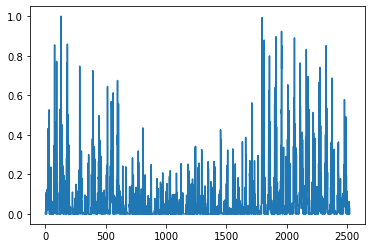

In [74]:
plt.plot(data)

In [75]:
Data = (np.array(data))
Data = np.reshape(Data , (Data.shape[0],1))

slt = int(0.80*len(data))
Train = Data[:slt]
Test = Data[slt:]
DT = Dt[slt:]

In [45]:
slt

2016

In [46]:
# import matplotlib.pyplot as plt
# #plt.figure(figsize=(160, 40))
# f = plt.figure() 
# f.set_figwidth(60) 
# f.set_figheight(40)
# # naming the x and y axis 
# plt.xticks(fontsize=30, rotation=90)
# plt.yticks(fontsize=30, rotation=90)
# plt.xlabel('Weeks') 
# plt.ylabel('Total amount of rainfall') 
# plt.plot(list(range(0,rf_tr.shape[0])), rf_tr, 'b', linestyle='-',linewidth='5',label = 'Fitted Rainfall')
# plt.plot(list(range(rf_tr.shape[0],XX.shape[0]-1)), rf_tst, 'r',linestyle='-',linewidth='5',label = 'Predicted')
# plt.plot(list(range(0,len(tot_RF))), data, 'g',linestyle='-',linewidth='2',label = 'Actual Rainfall')
# #plt.legend(loc='best',prop={'size': 40})
# plt.show()

# HMM

In [47]:
import pickle
import numpy as np
from hmmlearn import hmm


class GmmHmmLikelihoodSimilarity:
    """
    GMM-HMM forecasting model based on the paper:
    "Stock Market Forecasting Using Hidden Markov Model: A New Approach
    Md. Rafiul Hassan and Baikunth Nath, The University of Melbourne,
    Carlton 3010, Australia"
    link:
    http://mleg.cse.sc.edu/edu/csce768/uploads/Main.ReadingList/HMM-stock.pdf
    """

    @staticmethod
    def load(modelLoadPath):
        """
        Loads the model from the provided filepath

        :param modelLoadPath: path from where to load the model
        :return: model which is loaded from the given path
        """

        model = GmmHmmLikelihoodSimilarity(
            None, None, None,
            loadModel=True
        )

        with open(modelLoadPath, 'rb') as fl:
            loadDict = pickle.load(fl)

        model.model = pricesloadDict['model']
        model.closestLikelihoodObsDiff = loadDict['closestLikelihoodObsDiff']
        model.dimension = loadDict['dimension']

        return model

    def __init__(
            self,
            numStates,
            numMixtureComp,
            dimension,
            numIterations=10,
            threshold=1e-7,
            covariance_type='full',
            verbose=False,
            loadModel=False
    ):
        """
        Initialize GMM-HMM model using the provided parameters, note that
        the training information has to be provided during the now itself,
        and the train function then has to be called exactly once

        :param numStates: number of states of the HMM
        :param numMixtureComp: number of mixture components present in
        each of the emission probabilities
        :param dimension: dimension of the observations
        :param numIterations: number of iterations of training to be
        performed
        :param threshold: value such that the training procedure
        is said to have converged if the increase in log likelihood
        is lesser than this value
        :param covariance_type: type of covariance matrix to use
        for the mixture components of the GMM emission distribution
        :param verbose: if True, then display training info, else
        do not display training info (training info: log likelihood
        at each iteration)
        :param loadModel: True or False - do not use this parameter !,
        this is for internal use only (i.e. it is an implementation detail)
        If True, then object is normally created, else object is created
        without any member values being created. This is used when model
        is created by the static load method
        """

        if loadModel:
            return

        self.model = hmm.GMMHMM(
            n_components=numStates,
            n_mix=numMixtureComp,
            covariance_type=covariance_type,
            n_iter=numIterations,
            tol=threshold,
            verbose=verbose
        )

        self.dimension = dimension
        self.closestLikelihoodObsDiff = None

    def train(self, trainSequences):
        """
        Train the model on the provided training sequences. This
        function is to be called exactly once.

        :param trainSequences: list of numpy arrays of shape (ni, dimension),
        where each numpy array can represents an observation sequence. Hence,
        each numpy array can have any length (axis 0) but has to have exactly
        'dimension' as the dimension of axis 1
        :return: list of log likelihood values corresponding to each iteration
        """

        X = np.concatenate(trainSequences, axis=0)
        assert X.shape[1] == self.dimension
        lengths = [seq.shape[0] for seq in trainSequences]

        self.model.fit(X=X, lengths=lengths)
        self.closestLikelihoodObsDiff = ClosestLikelihoodObsDiff(
            hmmModel=self.model, trainSequences=trainSequences
        )

        return list(self.model.monitor_.history)

    def predict(self, X):
        """
        Forecast using the model parameters on the provided input data. A thing
        to note is that only the last prediction is useful, since one already
        has the true observations for the predictions made by this function, but
        this allows one to see the performance of this algorithm.

        :param X: observation sequence, it is a numpy array of shape (n, dimension)
        :return: for every observation in X, predict the next timestep value, hence
        prediction is a numpy array of shape (n, d)
        """

        pred = []
        for i in range(X.shape[0]):
            currObs = X[i]
            currLogLikelihood = self.model.score(np.expand_dims(currObs, axis=0))
            obsDiff = self\
                .closestLikelihoodObsDiff\
                .getClosestLikelihoodObsDiff(currLogLikelihood)
            nextObs = currObs + obsDiff

            pred.append(max(0.0,nextObs[0]))

        pred = np.array(pred)
        return pred

    def save(self, modelSavePath):
        """
        Save the model at the provided filepath

        :param modelSavePath: path where to store the model
        """

        assert self.closestLikelihoodObsDiff is not None, 'fit should be called'

        saveDict = {
            'model': self.model,
            'closestLikelihoodObsDiff': self.closestLikelihoodObsDiff,
            'dimension': self.dimension
        }

        with open(modelSavePath, 'wb') as fl:
            pickle.dump(saveDict, fl)


class ClosestLikelihoodObsDiff:
    """
    Data Structure for finding the observation in the current dataset
    whose likelihood is closest to the provided input likelihood as a
    query. Actually, instead of outputting the observation, it outputs
    the difference between next and current observation found.
    """

    def __init__(self, hmmModel, trainSequences):
        """
        Constructs the data structure using the trained HMM model and
        training sequences

        :param hmmModel: The trained HMM model
        :param trainSequences: Training Sequences
        """

        self.likelihoodObsDiff = []

        for seq in trainSequences:
            for i in range(seq.shape[0] - 1):
                obsDiff = seq[i + 1] - seq[i]
                logLikelihood = hmmModel.score(np.expand_dims(seq[i], axis=0))

                self.likelihoodObsDiff.append((logLikelihood, obsDiff))

        self.likelihoodObsDiff.sort(
            key=lambda logLikelihoodObsDiff: logLikelihoodObsDiff[0]
        )

    def getClosestLikelihoodObsDiff(self, logLikelihood):
        """
        Outputs the observation difference between the observation
        which has closest log likelihood to 'logLikelihood' and
        the next observation to this observation which is found.
        This is used using the binary search technique

        :param logLikelihood: The input log likelihood
        :return: observation difference between the observation
        which has closest log likelihood to 'logLikelihood' and
        the next observation to this observation which is found
        """

        n = len(self.likelihoodObsDiff)

        if logLikelihood <= self.likelihoodObsDiff[0][0]:
            return self.likelihoodObsDiff[0][1]
        elif logLikelihood >= self.likelihoodObsDiff[n - 1][0]:
            return self.likelihoodObsDiff[n - 1][1]

        low = 0
        high = n - 1
        ansIdx = 0

        # Binary Search - find largest log likelihood which is
        # smaller or equal to the input 'logLikelihood'
        while low <= high:
            mid = (low + high) >> 1

            if self.likelihoodObsDiff[mid][0] <= logLikelihood:
                ansIdx = max(ansIdx, mid)
                low = mid + 1
            else:
                high = mid - 1

        if (logLikelihood - self.likelihoodObsDiff[ansIdx][0]
                < self.likelihoodObsDiff[ansIdx + 1][0] - logLikelihood):
            return self.likelihoodObsDiff[ansIdx][1]

        else:
            return self.likelihoodObsDiff[ansIdx + 1][1]


In [48]:
scr =[]

In [49]:
# best_model = None
# n_s = 0
# n_Mx = 0
# scr = []
# m_s = 0
# for i in range(1,10):
#     for j in range(1,10):
#         numStates = i
#         numMixtureComp = j
#         dimension = 1
#         numIterations = 40
#         threshold = 0.0
#         covariance_type = 'full'
#         verbose = True


#         model = GmmHmmLikelihoodSimilarity(
#             numStates=numStates,
#             numMixtureComp=numMixtureComp,
#             dimension=dimension,
#             numIterations=numIterations,
#             threshold=threshold,
#             covariance_type=covariance_type,
#             verbose = True
#         )

#         logLikelihoodValues = model.train([Train])
#         s = model.model.score(Train)
#         if(m_s < s):
#             m_s = s
#             best_model = model
#             n_s =i
#             n_Mx = j
#         scr.append(s)

In [50]:
numStates = 6
numMixtureComp = 4
dimension = 1
numIterations = 30
threshold = -1000000
covariance_type = 'full'
verbose = True


model = GmmHmmLikelihoodSimilarity(
    numStates=numStates,
    numMixtureComp=numMixtureComp,
    dimension=dimension,
    numIterations=numIterations,
    threshold=threshold,
    covariance_type=covariance_type,
    verbose = True)

In [51]:
logLikelihoodValues = model.train([Train])

         1         455.6518             +nan
         2        2557.4670       +2101.8151
         3        3274.3904        +716.9234
         4        3824.5469        +550.1565
         5        4244.5119        +419.9650
         6        4578.4044        +333.8925
         7        4897.0070        +318.6025
         8        5247.5980        +350.5910
         9        5615.1895        +367.5915
        10        6050.4354        +435.2459
        11        6528.5843        +478.1489
        12        7114.3114        +585.7271
        13        8146.0050       +1031.6936
        14       10069.7404       +1923.7354
        15       19537.4884       +9467.7480
        16        6726.4489      -12811.0396
        17        7541.4198        +814.9709
        18        8383.9984        +842.5786
        19       10104.7218       +1720.7234
        20       21846.4879      +11741.7662
        21        6740.8497      -15105.6382
        22        7569.9843        +829.1345
        23

Covariance of state #0, mixture #0 has a null eigenvalue.
Covariance of state #0, mixture #0 has a null eigenvalue.
Covariance of state #0, mixture #0 has a null eigenvalue.
Covariance of state #0, mixture #0 has a null eigenvalue.
Covariance of state #0, mixture #0 has a null eigenvalue.
Covariance of state #0, mixture #0 has a null eigenvalue.
Covariance of state #0, mixture #0 has a null eigenvalue.
Covariance of state #0, mixture #0 has a null eigenvalue.
Covariance of state #0, mixture #0 has a null eigenvalue.
Covariance of state #0, mixture #0 has a null eigenvalue.
Covariance of state #0, mixture #0 has a null eigenvalue.
Covariance of state #0, mixture #0 has a null eigenvalue.
Covariance of state #0, mixture #0 has a null eigenvalue.
Covariance of state #0, mixture #0 has a null eigenvalue.
Covariance of state #0, mixture #0 has a null eigenvalue.
Covariance of state #0, mixture #0 has a null eigenvalue.
Covariance of state #0, mixture #0 has a null eigenvalue.
Covariance of 

Covariance of state #0, mixture #0 has a null eigenvalue.
Covariance of state #0, mixture #0 has a null eigenvalue.
Covariance of state #0, mixture #0 has a null eigenvalue.
Covariance of state #0, mixture #0 has a null eigenvalue.
Covariance of state #0, mixture #0 has a null eigenvalue.
Covariance of state #0, mixture #0 has a null eigenvalue.
Covariance of state #0, mixture #0 has a null eigenvalue.
Covariance of state #0, mixture #0 has a null eigenvalue.
Covariance of state #0, mixture #0 has a null eigenvalue.
Covariance of state #0, mixture #0 has a null eigenvalue.
Covariance of state #0, mixture #0 has a null eigenvalue.
Covariance of state #0, mixture #0 has a null eigenvalue.
Covariance of state #0, mixture #0 has a null eigenvalue.
Covariance of state #0, mixture #0 has a null eigenvalue.
Covariance of state #0, mixture #0 has a null eigenvalue.
Covariance of state #0, mixture #0 has a null eigenvalue.
Covariance of state #0, mixture #0 has a null eigenvalue.
Covariance of 

Covariance of state #0, mixture #0 has a null eigenvalue.
Covariance of state #0, mixture #0 has a null eigenvalue.
Covariance of state #0, mixture #0 has a null eigenvalue.
Covariance of state #0, mixture #0 has a null eigenvalue.
Covariance of state #0, mixture #0 has a null eigenvalue.
Covariance of state #0, mixture #0 has a null eigenvalue.
Covariance of state #0, mixture #0 has a null eigenvalue.
Covariance of state #0, mixture #0 has a null eigenvalue.
Covariance of state #0, mixture #0 has a null eigenvalue.
Covariance of state #0, mixture #0 has a null eigenvalue.
Covariance of state #0, mixture #0 has a null eigenvalue.
Covariance of state #0, mixture #0 has a null eigenvalue.
Covariance of state #0, mixture #0 has a null eigenvalue.
Covariance of state #0, mixture #0 has a null eigenvalue.
Covariance of state #0, mixture #0 has a null eigenvalue.
Covariance of state #0, mixture #0 has a null eigenvalue.
Covariance of state #0, mixture #0 has a null eigenvalue.
Covariance of 

Covariance of state #0, mixture #0 has a null eigenvalue.
Covariance of state #0, mixture #0 has a null eigenvalue.
Covariance of state #0, mixture #0 has a null eigenvalue.
Covariance of state #0, mixture #0 has a null eigenvalue.
Covariance of state #0, mixture #0 has a null eigenvalue.
Covariance of state #0, mixture #0 has a null eigenvalue.
Covariance of state #0, mixture #0 has a null eigenvalue.
Covariance of state #0, mixture #0 has a null eigenvalue.
Covariance of state #0, mixture #0 has a null eigenvalue.
Covariance of state #0, mixture #0 has a null eigenvalue.
Covariance of state #0, mixture #0 has a null eigenvalue.
Covariance of state #0, mixture #0 has a null eigenvalue.
Covariance of state #0, mixture #0 has a null eigenvalue.
Covariance of state #0, mixture #0 has a null eigenvalue.
Covariance of state #0, mixture #0 has a null eigenvalue.
Covariance of state #0, mixture #0 has a null eigenvalue.
Covariance of state #0, mixture #0 has a null eigenvalue.
Covariance of 

Covariance of state #0, mixture #0 has a null eigenvalue.
Covariance of state #0, mixture #0 has a null eigenvalue.
Covariance of state #0, mixture #0 has a null eigenvalue.
Covariance of state #0, mixture #0 has a null eigenvalue.
Covariance of state #0, mixture #0 has a null eigenvalue.
Covariance of state #0, mixture #0 has a null eigenvalue.
Covariance of state #0, mixture #0 has a null eigenvalue.
Covariance of state #0, mixture #0 has a null eigenvalue.
Covariance of state #0, mixture #0 has a null eigenvalue.
Covariance of state #0, mixture #0 has a null eigenvalue.
Covariance of state #0, mixture #0 has a null eigenvalue.
Covariance of state #0, mixture #0 has a null eigenvalue.
Covariance of state #0, mixture #0 has a null eigenvalue.
Covariance of state #0, mixture #0 has a null eigenvalue.
Covariance of state #0, mixture #0 has a null eigenvalue.
Covariance of state #0, mixture #0 has a null eigenvalue.
Covariance of state #0, mixture #0 has a null eigenvalue.
Covariance of 

Covariance of state #0, mixture #0 has a null eigenvalue.
Covariance of state #0, mixture #0 has a null eigenvalue.
Covariance of state #0, mixture #0 has a null eigenvalue.
Covariance of state #0, mixture #0 has a null eigenvalue.
Covariance of state #0, mixture #0 has a null eigenvalue.
Covariance of state #0, mixture #0 has a null eigenvalue.
Covariance of state #0, mixture #0 has a null eigenvalue.
Covariance of state #0, mixture #0 has a null eigenvalue.
Covariance of state #0, mixture #0 has a null eigenvalue.
Covariance of state #0, mixture #0 has a null eigenvalue.
Covariance of state #0, mixture #0 has a null eigenvalue.
Covariance of state #0, mixture #0 has a null eigenvalue.
Covariance of state #0, mixture #0 has a null eigenvalue.
Covariance of state #0, mixture #0 has a null eigenvalue.
Covariance of state #0, mixture #0 has a null eigenvalue.
Covariance of state #0, mixture #0 has a null eigenvalue.
Covariance of state #0, mixture #0 has a null eigenvalue.
Covariance of 

Covariance of state #0, mixture #0 has a null eigenvalue.
Covariance of state #0, mixture #0 has a null eigenvalue.
Covariance of state #0, mixture #0 has a null eigenvalue.
Covariance of state #0, mixture #0 has a null eigenvalue.
Covariance of state #0, mixture #0 has a null eigenvalue.
Covariance of state #0, mixture #0 has a null eigenvalue.
Covariance of state #0, mixture #0 has a null eigenvalue.
Covariance of state #0, mixture #0 has a null eigenvalue.
Covariance of state #0, mixture #0 has a null eigenvalue.
Covariance of state #0, mixture #0 has a null eigenvalue.
Covariance of state #0, mixture #0 has a null eigenvalue.
Covariance of state #0, mixture #0 has a null eigenvalue.
Covariance of state #0, mixture #0 has a null eigenvalue.
Covariance of state #0, mixture #0 has a null eigenvalue.
Covariance of state #0, mixture #0 has a null eigenvalue.
Covariance of state #0, mixture #0 has a null eigenvalue.
Covariance of state #0, mixture #0 has a null eigenvalue.
Covariance of 

Covariance of state #0, mixture #0 has a null eigenvalue.
Covariance of state #0, mixture #0 has a null eigenvalue.
Covariance of state #0, mixture #0 has a null eigenvalue.
Covariance of state #0, mixture #0 has a null eigenvalue.
Covariance of state #0, mixture #0 has a null eigenvalue.
Covariance of state #0, mixture #0 has a null eigenvalue.
Covariance of state #0, mixture #0 has a null eigenvalue.
Covariance of state #0, mixture #0 has a null eigenvalue.
Covariance of state #0, mixture #0 has a null eigenvalue.
Covariance of state #0, mixture #0 has a null eigenvalue.
Covariance of state #0, mixture #0 has a null eigenvalue.
Covariance of state #0, mixture #0 has a null eigenvalue.
Covariance of state #0, mixture #0 has a null eigenvalue.
Covariance of state #0, mixture #0 has a null eigenvalue.
Covariance of state #0, mixture #0 has a null eigenvalue.
Covariance of state #0, mixture #0 has a null eigenvalue.
Covariance of state #0, mixture #0 has a null eigenvalue.
Covariance of 

Covariance of state #0, mixture #0 has a null eigenvalue.
Covariance of state #0, mixture #0 has a null eigenvalue.
Covariance of state #0, mixture #0 has a null eigenvalue.
Covariance of state #0, mixture #0 has a null eigenvalue.
Covariance of state #0, mixture #0 has a null eigenvalue.
Covariance of state #0, mixture #0 has a null eigenvalue.
Covariance of state #0, mixture #0 has a null eigenvalue.
Covariance of state #0, mixture #0 has a null eigenvalue.
Covariance of state #0, mixture #0 has a null eigenvalue.
Covariance of state #0, mixture #0 has a null eigenvalue.
Covariance of state #0, mixture #0 has a null eigenvalue.
Covariance of state #0, mixture #0 has a null eigenvalue.
Covariance of state #0, mixture #0 has a null eigenvalue.
Covariance of state #0, mixture #0 has a null eigenvalue.
Covariance of state #0, mixture #0 has a null eigenvalue.
Covariance of state #0, mixture #0 has a null eigenvalue.
Covariance of state #0, mixture #0 has a null eigenvalue.
Covariance of 

Covariance of state #0, mixture #0 has a null eigenvalue.
Covariance of state #0, mixture #0 has a null eigenvalue.
Covariance of state #0, mixture #0 has a null eigenvalue.
Covariance of state #0, mixture #0 has a null eigenvalue.
Covariance of state #0, mixture #0 has a null eigenvalue.
Covariance of state #0, mixture #0 has a null eigenvalue.
Covariance of state #0, mixture #0 has a null eigenvalue.
Covariance of state #0, mixture #0 has a null eigenvalue.
Covariance of state #0, mixture #0 has a null eigenvalue.
Covariance of state #0, mixture #0 has a null eigenvalue.
Covariance of state #0, mixture #0 has a null eigenvalue.
Covariance of state #0, mixture #0 has a null eigenvalue.
Covariance of state #0, mixture #0 has a null eigenvalue.
Covariance of state #0, mixture #0 has a null eigenvalue.
Covariance of state #0, mixture #0 has a null eigenvalue.
Covariance of state #0, mixture #0 has a null eigenvalue.
Covariance of state #0, mixture #0 has a null eigenvalue.
Covariance of 

Covariance of state #0, mixture #0 has a null eigenvalue.
Covariance of state #0, mixture #0 has a null eigenvalue.
Covariance of state #0, mixture #0 has a null eigenvalue.
Covariance of state #0, mixture #0 has a null eigenvalue.
Covariance of state #0, mixture #0 has a null eigenvalue.
Covariance of state #0, mixture #0 has a null eigenvalue.
Covariance of state #0, mixture #0 has a null eigenvalue.
Covariance of state #0, mixture #0 has a null eigenvalue.
Covariance of state #0, mixture #0 has a null eigenvalue.
Covariance of state #0, mixture #0 has a null eigenvalue.
Covariance of state #0, mixture #0 has a null eigenvalue.
Covariance of state #0, mixture #0 has a null eigenvalue.
Covariance of state #0, mixture #0 has a null eigenvalue.
Covariance of state #0, mixture #0 has a null eigenvalue.
Covariance of state #0, mixture #0 has a null eigenvalue.
Covariance of state #0, mixture #0 has a null eigenvalue.
Covariance of state #0, mixture #0 has a null eigenvalue.
Covariance of 

Covariance of state #0, mixture #0 has a null eigenvalue.
Covariance of state #0, mixture #0 has a null eigenvalue.
Covariance of state #0, mixture #0 has a null eigenvalue.
Covariance of state #0, mixture #0 has a null eigenvalue.
Covariance of state #0, mixture #0 has a null eigenvalue.
Covariance of state #0, mixture #0 has a null eigenvalue.
Covariance of state #0, mixture #0 has a null eigenvalue.
Covariance of state #0, mixture #0 has a null eigenvalue.
Covariance of state #0, mixture #0 has a null eigenvalue.
Covariance of state #0, mixture #0 has a null eigenvalue.
Covariance of state #0, mixture #0 has a null eigenvalue.
Covariance of state #0, mixture #0 has a null eigenvalue.
Covariance of state #0, mixture #0 has a null eigenvalue.
Covariance of state #0, mixture #0 has a null eigenvalue.
Covariance of state #0, mixture #0 has a null eigenvalue.
Covariance of state #0, mixture #0 has a null eigenvalue.
Covariance of state #0, mixture #0 has a null eigenvalue.
Covariance of 

Covariance of state #0, mixture #0 has a null eigenvalue.
Covariance of state #0, mixture #0 has a null eigenvalue.
Covariance of state #0, mixture #0 has a null eigenvalue.
Covariance of state #0, mixture #0 has a null eigenvalue.
Covariance of state #0, mixture #0 has a null eigenvalue.
Covariance of state #0, mixture #0 has a null eigenvalue.
Covariance of state #0, mixture #0 has a null eigenvalue.
Covariance of state #0, mixture #0 has a null eigenvalue.
Covariance of state #0, mixture #0 has a null eigenvalue.
Covariance of state #0, mixture #0 has a null eigenvalue.
Covariance of state #0, mixture #0 has a null eigenvalue.
Covariance of state #0, mixture #0 has a null eigenvalue.
Covariance of state #0, mixture #0 has a null eigenvalue.
Covariance of state #0, mixture #0 has a null eigenvalue.
Covariance of state #0, mixture #0 has a null eigenvalue.
Covariance of state #0, mixture #0 has a null eigenvalue.
Covariance of state #0, mixture #0 has a null eigenvalue.
Covariance of 

Covariance of state #0, mixture #0 has a null eigenvalue.
Covariance of state #0, mixture #0 has a null eigenvalue.
Covariance of state #0, mixture #0 has a null eigenvalue.
Covariance of state #0, mixture #0 has a null eigenvalue.
Covariance of state #0, mixture #0 has a null eigenvalue.
Covariance of state #0, mixture #0 has a null eigenvalue.
Covariance of state #0, mixture #0 has a null eigenvalue.
Covariance of state #0, mixture #0 has a null eigenvalue.
Covariance of state #0, mixture #0 has a null eigenvalue.
Covariance of state #0, mixture #0 has a null eigenvalue.
Covariance of state #0, mixture #0 has a null eigenvalue.
Covariance of state #0, mixture #0 has a null eigenvalue.
Covariance of state #0, mixture #0 has a null eigenvalue.
Covariance of state #0, mixture #0 has a null eigenvalue.
Covariance of state #0, mixture #0 has a null eigenvalue.
Covariance of state #0, mixture #0 has a null eigenvalue.
Covariance of state #0, mixture #0 has a null eigenvalue.
Covariance of 

Has model converged:  True


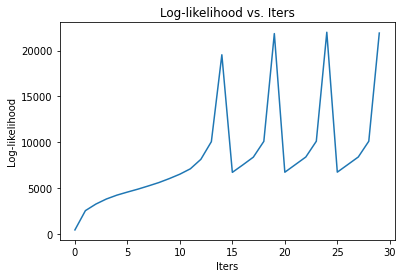

In [52]:
plt.plot(logLikelihoodValues, label='log-likelihood')
plt.xlabel('Iters')
plt.ylabel('Log-likelihood')
plt.title('Log-likelihood vs. Iters')
print('Has model converged: ', model.model.monitor_.converged)

In [53]:
pred = model.predict(Test)

Covariance of state #0, mixture #0 has a null eigenvalue.
Covariance of state #0, mixture #0 has a null eigenvalue.
Covariance of state #0, mixture #0 has a null eigenvalue.
Covariance of state #0, mixture #0 has a null eigenvalue.
Covariance of state #0, mixture #0 has a null eigenvalue.
Covariance of state #0, mixture #0 has a null eigenvalue.
Covariance of state #0, mixture #0 has a null eigenvalue.
Covariance of state #0, mixture #0 has a null eigenvalue.
Covariance of state #0, mixture #0 has a null eigenvalue.
Covariance of state #0, mixture #0 has a null eigenvalue.
Covariance of state #0, mixture #0 has a null eigenvalue.
Covariance of state #0, mixture #0 has a null eigenvalue.
Covariance of state #0, mixture #0 has a null eigenvalue.
Covariance of state #0, mixture #0 has a null eigenvalue.
Covariance of state #0, mixture #0 has a null eigenvalue.
Covariance of state #0, mixture #0 has a null eigenvalue.
Covariance of state #0, mixture #0 has a null eigenvalue.
Covariance of 

Covariance of state #0, mixture #0 has a null eigenvalue.
Covariance of state #0, mixture #0 has a null eigenvalue.
Covariance of state #0, mixture #0 has a null eigenvalue.
Covariance of state #0, mixture #0 has a null eigenvalue.
Covariance of state #0, mixture #0 has a null eigenvalue.
Covariance of state #0, mixture #0 has a null eigenvalue.
Covariance of state #0, mixture #0 has a null eigenvalue.
Covariance of state #0, mixture #0 has a null eigenvalue.
Covariance of state #0, mixture #0 has a null eigenvalue.
Covariance of state #0, mixture #0 has a null eigenvalue.
Covariance of state #0, mixture #0 has a null eigenvalue.
Covariance of state #0, mixture #0 has a null eigenvalue.
Covariance of state #0, mixture #0 has a null eigenvalue.
Covariance of state #0, mixture #0 has a null eigenvalue.
Covariance of state #0, mixture #0 has a null eigenvalue.
Covariance of state #0, mixture #0 has a null eigenvalue.
Covariance of state #0, mixture #0 has a null eigenvalue.
Covariance of 

Covariance of state #0, mixture #0 has a null eigenvalue.
Covariance of state #0, mixture #0 has a null eigenvalue.
Covariance of state #0, mixture #0 has a null eigenvalue.
Covariance of state #0, mixture #0 has a null eigenvalue.
Covariance of state #0, mixture #0 has a null eigenvalue.
Covariance of state #0, mixture #0 has a null eigenvalue.
Covariance of state #0, mixture #0 has a null eigenvalue.
Covariance of state #0, mixture #0 has a null eigenvalue.
Covariance of state #0, mixture #0 has a null eigenvalue.
Covariance of state #0, mixture #0 has a null eigenvalue.
Covariance of state #0, mixture #0 has a null eigenvalue.
Covariance of state #0, mixture #0 has a null eigenvalue.
Covariance of state #0, mixture #0 has a null eigenvalue.
Covariance of state #0, mixture #0 has a null eigenvalue.
Covariance of state #0, mixture #0 has a null eigenvalue.
Covariance of state #0, mixture #0 has a null eigenvalue.
Covariance of state #0, mixture #0 has a null eigenvalue.
Covariance of 

Covariance of state #0, mixture #0 has a null eigenvalue.
Covariance of state #0, mixture #0 has a null eigenvalue.
Covariance of state #0, mixture #0 has a null eigenvalue.
Covariance of state #0, mixture #0 has a null eigenvalue.
Covariance of state #0, mixture #0 has a null eigenvalue.
Covariance of state #0, mixture #0 has a null eigenvalue.
Covariance of state #0, mixture #0 has a null eigenvalue.
Covariance of state #0, mixture #0 has a null eigenvalue.
Covariance of state #0, mixture #0 has a null eigenvalue.
Covariance of state #0, mixture #0 has a null eigenvalue.
Covariance of state #0, mixture #0 has a null eigenvalue.
Covariance of state #0, mixture #0 has a null eigenvalue.
Covariance of state #0, mixture #0 has a null eigenvalue.
Covariance of state #0, mixture #0 has a null eigenvalue.
Covariance of state #0, mixture #0 has a null eigenvalue.
Covariance of state #0, mixture #0 has a null eigenvalue.
Covariance of state #0, mixture #0 has a null eigenvalue.
Covariance of 

In [64]:
p2 = pred*(U[1] - U[0]) + U[0]
T1 = Test*(U[1] - U[0]) + U[0]

In [77]:
len(DT)

505

In [90]:
xaxis = [DT[i] for i in range(0,505,10)]
ticks = [i+1 for i in range(0,505,10)]

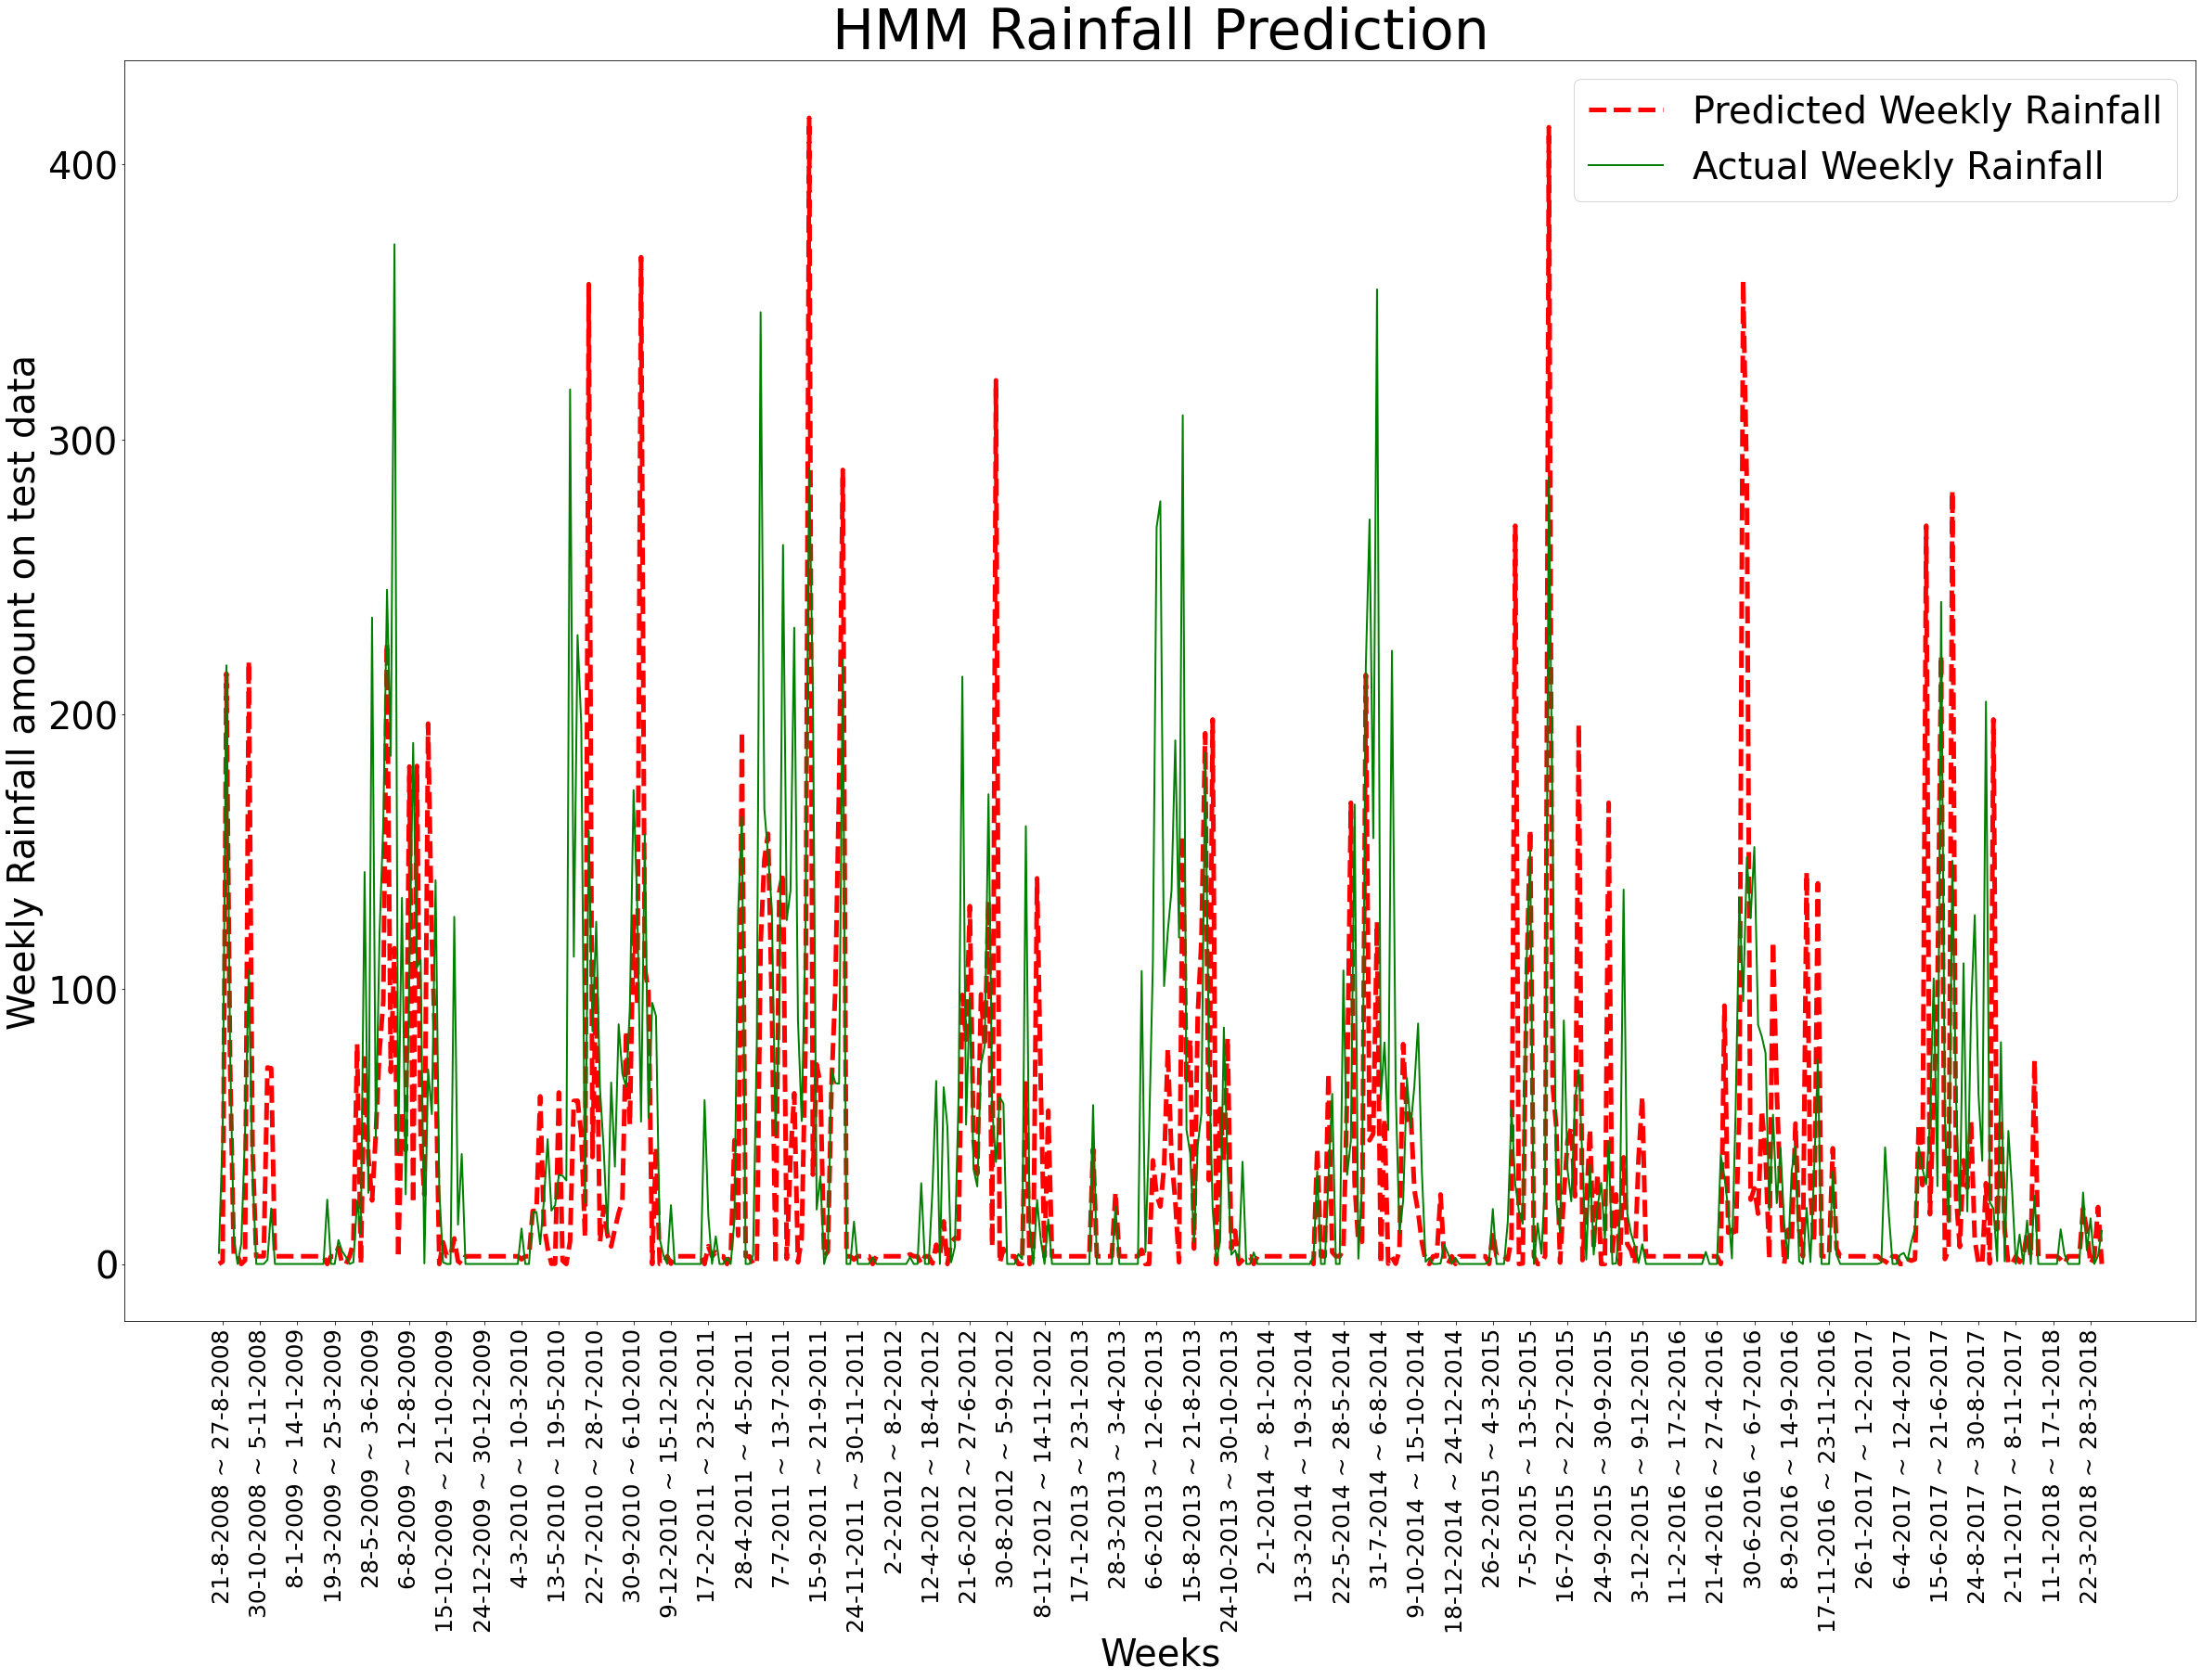

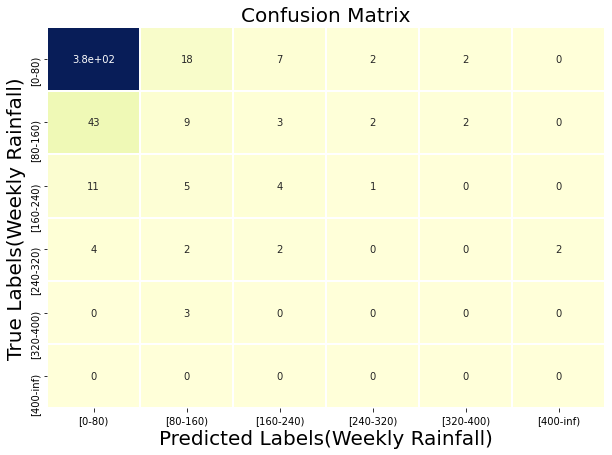

In [107]:
f = plt.figure() 
f.set_figwidth(40) 
f.set_figheight(25)
plt.title('HMM Rainfall Prediction', fontsize = 60)
plt.xticks(fontsize=25, rotation=90)
plt.yticks(fontsize=40, rotation=0)
plt.xticks(ticks,xaxis)
plt.ylabel('Weekly Rainfall amount on test data',fontsize=40)
plt.xlabel('Weeks',fontsize=40)
plt.plot(p2, 'r', linestyle='--', linewidth='5', label = 'Predicted Weekly Rainfall')
plt.plot(T1, 'g',linestyle='-', linewidth='2', label = 'Actual Weekly Rainfall')
plt.legend(loc='best',prop={'size': 40})





df_cm = pd.DataFrame(CM, index = [i for i in inter],
                  columns = [i for i in inter])
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True,cmap="YlGnBu",cbar=False, linewidths=1)
plt.title('Confusion Matrix', fontsize =20)
plt.xlabel("Predicted Labels(Weekly Rainfall)",fontsize =20)
plt.ylabel("True Labels(Weekly Rainfall)", fontsize =20)
plt.show()

In [92]:
mean_squared_error(T1, p2, squared=False)

62.51842334404909

In [93]:
mae(T1,p2)

33.082772277227726

In [94]:
d1 = np.array(T1)
d1 = np.reshape(d1 , d1.shape[0])
d2 = np.array(p2)
d2 = np.reshape(d2 , d2.shape[0])

corr, _ = pearsonr(d1, d2)
corr

0.5456835618649731

In [95]:
inter = ['[0-80)','[80-160)','[160-240)','[240-320)','[320-400)','[400-inf)']

In [101]:
test_lbl = np.floor(T1/80)
test_lbl = [int(i[0]) for i in test_lbl]
pred_lbl = np.floor(p2/80)
pred_lbl = [int(i) for i in pred_lbl]

CM = confusion_matrix(test_lbl, pred_lbl)


df_cm = pd.DataFrame(CM, index = [i for i in inter],
                  columns = [i for i in inter])
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True,cmap="YlGnBu",cbar=False, linewidths=1)
plt.title('Confusion Matrix', fontsize =20)
plt.xlabel("Predicted Labels(Weekly Rainfall)",fontsize =20)
plt.ylabel("True Labels(Weekly Rainfall)", fontsize =20)
plt.show()

In [102]:
CM

array([[383,  18,   7,   2,   2,   0],
       [ 43,   9,   3,   2,   2,   0],
       [ 11,   5,   4,   1,   0,   0],
       [  4,   2,   2,   0,   0,   2],
       [  0,   3,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0]])

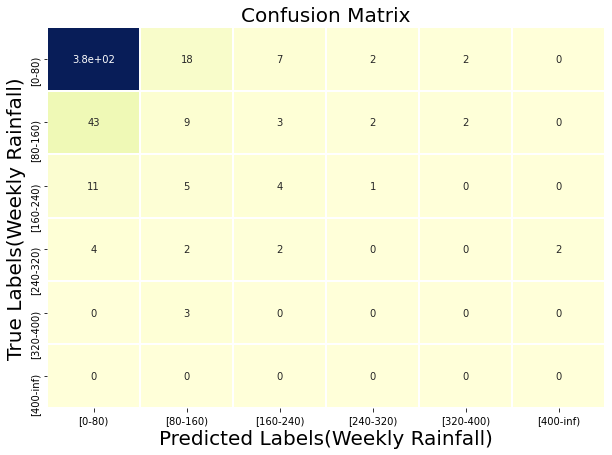

# GMM-K-likelihood

In [108]:
import pickle
import numpy as np
from hmmlearn import hmm


class GmmHmmLikelihoodSimilarity_K:
    """
    GMM-HMM forecasting model based on the paper:
    "Stock Market Forecasting Using Hidden Markov Model: A New Approach
    Md. Rafiul Hassan and Baikunth Nath, The University of Melbourne,
    Carlton 3010, Australia"
    link:
    http://mleg.cse.sc.edu/edu/csce768/uploads/Main.ReadingList/HMM-stock.pdf
    """

    @staticmethod
    def load(modelLoadPath):
        """
        Loads the model from the provided filepath

        :param modelLoadPath: path from where to load the model
        :return: model which is loaded from the given path
        """

        model = GmmHmmLikelihoodSimilarity(
            None, None, None,
            loadModel=True
        )

        with open(modelLoadPath, 'rb') as fl:
            loadDict = pickle.load(fl)

        model.model = loadDict['model']
        model.closestLikelihoodObsDiff = loadDict['closestLikelihoodObsDiff']
        model.dimension = loadDict['dimension']

        return model

    def __init__(
            self,
            numStates,
            numMixtureComp,
            dimension,
            numIterations=10,
            threshold=1e-7,
            covariance_type='full',
            verbose=False,
            loadModel=False
    ):
        """
        Initialize GMM-HMM model using the provided parameters, note that
        the training information has to be provided during the now itself,
        and the train function then has to be called exactly once

        :param numStates: number of states of the HMM
        :param numMixtureComp: number of mixture components present in
        each of the emission probabilities
        :param dimension: dimension of the observations
        :param numIterations: number of iterations of training to be
        performed
        :param threshold: value such that the training procedure
        is said to have converged if the increase in log likelihood
        is lesser than this value
        :param covariance_type: type of covariance matrix to use
        for the mixture components of the GMM emission distribution
        :param verbose: if True, then display training info, else
        do not display training info (training info: log likelihood
        at each iteration)
        :param loadModel: True or False - do not use this parameter !,
        this is for internal use only (i.e. it is an implementation detail)
        If True, then object is normally created, else object is created
        without any member values being created. This is used when model
        is created by the static load method
        """

        if loadModel:
            return

        self.model = hmm.GMMHMM(
            n_components=numStates,
            n_mix=numMixtureComp,
            covariance_type=covariance_type,
            n_iter=numIterations,
            tol=threshold,
            verbose=verbose
        )

        self.dimension = dimension
        self.closestLikelihoodObsDiff = None

    def train(self, trainSequences):
        """
        Train the model on the provided training sequences. This
        function is to be called exactly once.

        :param trainSequences: list of numpy arrays of shape (ni, dimension),
        where each numpy array can represents an observation sequence. Hence,
        each numpy array can have any length (axis 0) but has to have exactly
        'dimension' as the dimension of axis 1
        :return: list of log likelihood values corresponding to each iteration
        """

        X = np.concatenate(trainSequences, axis=0)
        assert X.shape[1] == self.dimension
        lengths = [seq.shape[0] for seq in trainSequences]

        self.model.fit(X=X, lengths=lengths)
        self.closestLikelihoodObsDiff = ClosestLikelihoodObsDiff(
            hmmModel=self.model, trainSequences=trainSequences
        )

        return list(self.model.monitor_.history)

    def predict(self, X, k=3):
        """
        Forecast using the model parameters on the provided input data. A thing
        to note is that only the last prediction is useful, since one already
        has the true observations for the predictions made by this function, but
        this allows one to see the performance of this algorithm.

        :param X: observation sequence, it is a numpy array of shape (n, dimension)
        :return: for every observation in X, predict the next timestep value, hence
        prediction is a numpy array of shape (n, d)
        """

        pred = []
        for i in range(X.shape[0]):
            currObs = X[i]
            currLogLikelihood = self.model.score(np.expand_dims(currObs, axis=0))
            obsDiffArr = self\
                .closestLikelihoodObsDiff\
                .getClosestLikelihoodObsDiff(currLogLikelihood, k)

            obsDiffCoeff = list(map(
                lambda x: 1. / (x[0]+1e-7),
                obsDiffArr
            ))
            
            #print(obsDiffArr)
            
            sumVal = sum(obsDiffCoeff)
            obsDiffCoeff = list(map(
                lambda x: x / sumVal,
                obsDiffCoeff
            ))

            obsDiff = sum([
                obsDiffCoeff[i] * obsDiffArr[i][1]
                for i in range(len(obsDiffCoeff))
            ])

            nextObs = currObs + obsDiff

            pred.append(nextObs)

        pred = np.array(pred)
        return pred

    def save(self, modelSavePath):
        """
        Save the model at the provided filepath

        :param modelSavePath: path where to store the model
        """

        assert self.closestLikelihoodObsDiff is not None, 'fit should be called'

        saveDict = {
            'model': self.model,
            'closestLikelihoodObsDiff': self.closestLikelihoodObsDiff,
            'dimension': self.dimension
        }

        with open(modelSavePath, 'wb') as fl:
            pickle.dump(saveDict, fl)


class ClosestLikelihoodObsDiff:
    """
    Data Structure for finding the observation in the current dataset
    whose likelihood is closest to the provided input likelihood as a
    query. Actually, instead of outputting the observation, it outputs
    the difference between next and current observation found.
    """

    def __init__(self, hmmModel, trainSequences):
        """
        Constructs the data structure using the trained HMM model and
        training sequences

        :param hmmModel: The trained HMM model
        :param trainSequences: Training Sequences
        """

        self.likelihoodObsDiff = []

        for seq in trainSequences:
            for i in range(seq.shape[0] - 1):
                obsDiff = seq[i + 1] - seq[i]
                logLikelihood = hmmModel.score(np.expand_dims(seq[i], axis=0))

                self.likelihoodObsDiff.append((logLikelihood, obsDiff))

        self.likelihoodObsDiff.sort(
            key=lambda logLikelihoodObsDiff: logLikelihoodObsDiff[0]
        )

    def replaceValue(self, arr, logLikelihood):

        return list(map(
            lambda x: (abs(x[0] - logLikelihood), x[1]),
            arr
        ))

    def getClosestLikelihoodObsDiff(self, logLikelihood, k):

        n = len(self.likelihoodObsDiff)

        if logLikelihood <= self.likelihoodObsDiff[0][0]:
            return self.replaceValue(self.likelihoodObsDiff[:min(k, n)], logLikelihood)
        elif logLikelihood >= self.likelihoodObsDiff[n - 1][0]:
            return self.replaceValue(self.likelihoodObsDiff[max(n - k, 0):], logLikelihood)

        low = 0
        high = n - 1
        ansIdx = 0

        # Binary Search - find largest log likelihood which is
        # smaller or equal to the input 'logLikelihood'
        while low <= high:
            mid = (low + high) >> 1

            if self.likelihoodObsDiff[mid][0] <= logLikelihood:
                ansIdx = max(ansIdx, mid)
                low = mid + 1
            else:
                high = mid - 1

        arrValues = self.replaceValue(
            self.likelihoodObsDiff[max(ansIdx - k + 1, 0): min(ansIdx + k + 1, n)],
            logLikelihood
        )
        arrValues.sort(key=lambda x: x[0])

        return arrValues[:k]  

In [109]:
numStates = 3
numMixtureComp = 2
dimension = 1
numIterations = 200
threshold = 0.0
covariance_type = 'full'
verbose = True

In [110]:
model3 = GmmHmmLikelihoodSimilarity_K(
    numStates=numStates,
    numMixtureComp=numMixtureComp,
    dimension=dimension,
    numIterations=numIterations,
    threshold=threshold,
    covariance_type=covariance_type,
    verbose = True
)

In [195]:
logValues = model3.train([Train])

Even though the 'startprob_' attribute is set, it will be overwritten during initialization because 'init_params' contains 's'
Even though the 'transmat_' attribute is set, it will be overwritten during initialization because 'init_params' contains 't'
Even though the 'weights_' attribute is set, it will be overwritten during initialization because 'init_params' contains 'w'
Even though the 'means_' attribute is set, it will be overwritten during initialization because 'init_params' contains 'm'
Even though the 'covars_' attribute is set, it will be overwritten during initialization because 'init_params' contains 'c'
         1         473.6961             +nan
         2        2561.5195       +2087.8234
         3        3262.1373        +700.6178
         4        3800.3040        +538.1667
         5        4231.5698        +431.2658
         6        4527.0983        +295.5285
         7        4725.7075        +198.6092
         8        4900.7964        +175.0889
         9     

Has model converged:  True


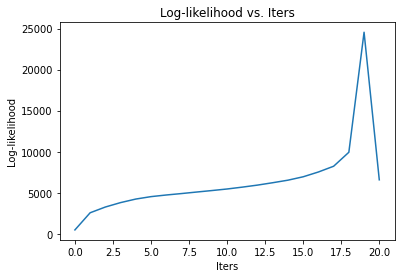

In [196]:
plt.plot(logValues, label='log-likelihood')
plt.xlabel('Iters')
plt.ylabel('Log-likelihood')
plt.title('Log-likelihood vs. Iters')
print('Has model converged: ', model.model.monitor_.converged)

In [ ]:
K = 2000
rmse = []
MAE = []
CC = []
for k in range(1,K):
    pred = model3.predict(Test,k)
    p2 = pred*(U[1] - U[0]) + U[0]
    T1 = Test*(U[1] - U[0]) + U[0]
    rmse.append(mean_squared_error(p2, T1, squared=False))
    MAE.append(mae(T1,p2))
    d1 = np.array(T1)
    d1 = np.reshape(d1 , d1.shape[0])
    d2 = np.array(p2)
    d2 = np.reshape(d2 , d2.shape[0])
    corr, _ = pearsonr(d1, d2)
    CC.append(corr)
    print(k)

NameError: name 'rmse' is not defined

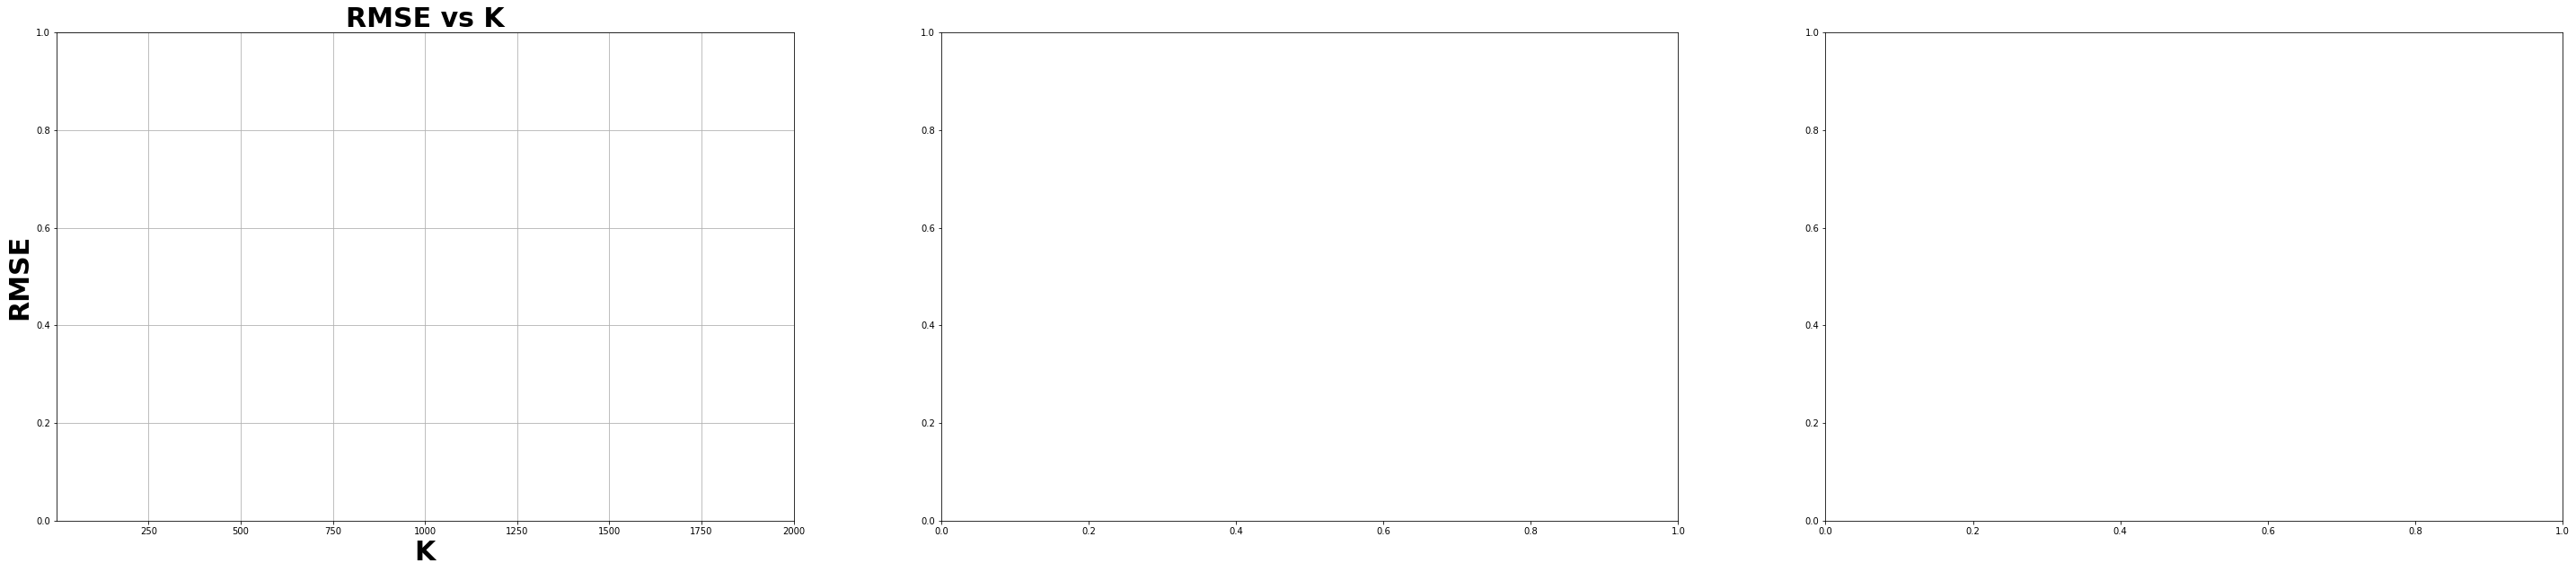

In [113]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (50,10))
ax1.set_xlim(1, 2000)
ax1.set_xlabel('K', fontweight ='bold', fontsize = 30)
ax1.set_ylabel('RMSE', fontweight ='bold', fontsize = 30)
ax1.grid(True)
ax1.set_title('RMSE vs K', fontsize = 30, fontweight ='bold')
ax1.plot(rmse)
ax1.tick_params(axis='both', which='major', labelsize=30)


ax2.set_xlim(1, 2000)
ax2.set_xlabel('K', fontweight ='bold', fontsize = 30)
ax2.set_ylabel('MAE', fontweight ='bold', fontsize = 30)
ax2.grid(True)
ax2.set_title('MAE vs K', fontsize = 30, fontweight ='bold')
ax2.plot(MAE)
ax2.tick_params(axis='both', which='major', labelsize=30)

ax3.set_xlim(1, 2000)
ax3.set_xlabel('K', fontweight ='bold', fontsize = 30)
ax3.set_ylabel('CC', fontweight ='bold', fontsize = 30)
ax3.grid(True)
ax3.set_title('CC vs K', fontsize = 30, fontweight ='bold')
ax3.plot(CC)
ax3.tick_params(axis='both', which='major', labelsize=30)


In [144]:
plt.plot(rmse)
plt.xlabel('K')
plt.ylabel('RMSE Value')
plt.title('RMSE vs. K')

NameError: name 'rmse' is not defined

In [89]:
diff = []
for i in range(len(rmse)-1):
    diff.append(rmse[i+1] - rmse[i])

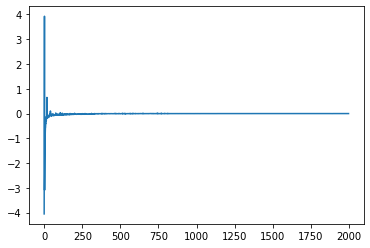

In [90]:
plt.plot(diff)

Text(0.5, 1.0, 'MAE vs. K')

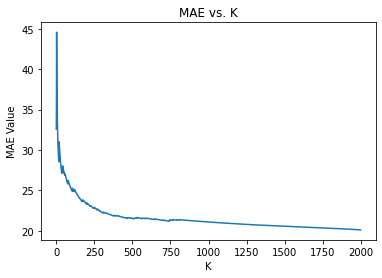

In [58]:
plt.plot(MAE)
plt.xlabel('K')
plt.ylabel('MAE Value')
plt.title('MAE vs. K')

In [59]:
CC[1828]

0.8426870352443803

Text(0.5, 1.0, 'CC vs. K')

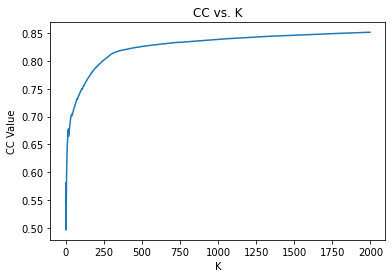

In [1066]:
plt.plot(CC)
plt.xlabel('K')
plt.ylabel('CC Value')
plt.title('CC vs. K')

In [197]:
pred = model3.predict(Test,400)
p2 = pred*(U[1] - U[0]) + U[0]
T1 = Test*(U[1] - U[0]) + U[0]

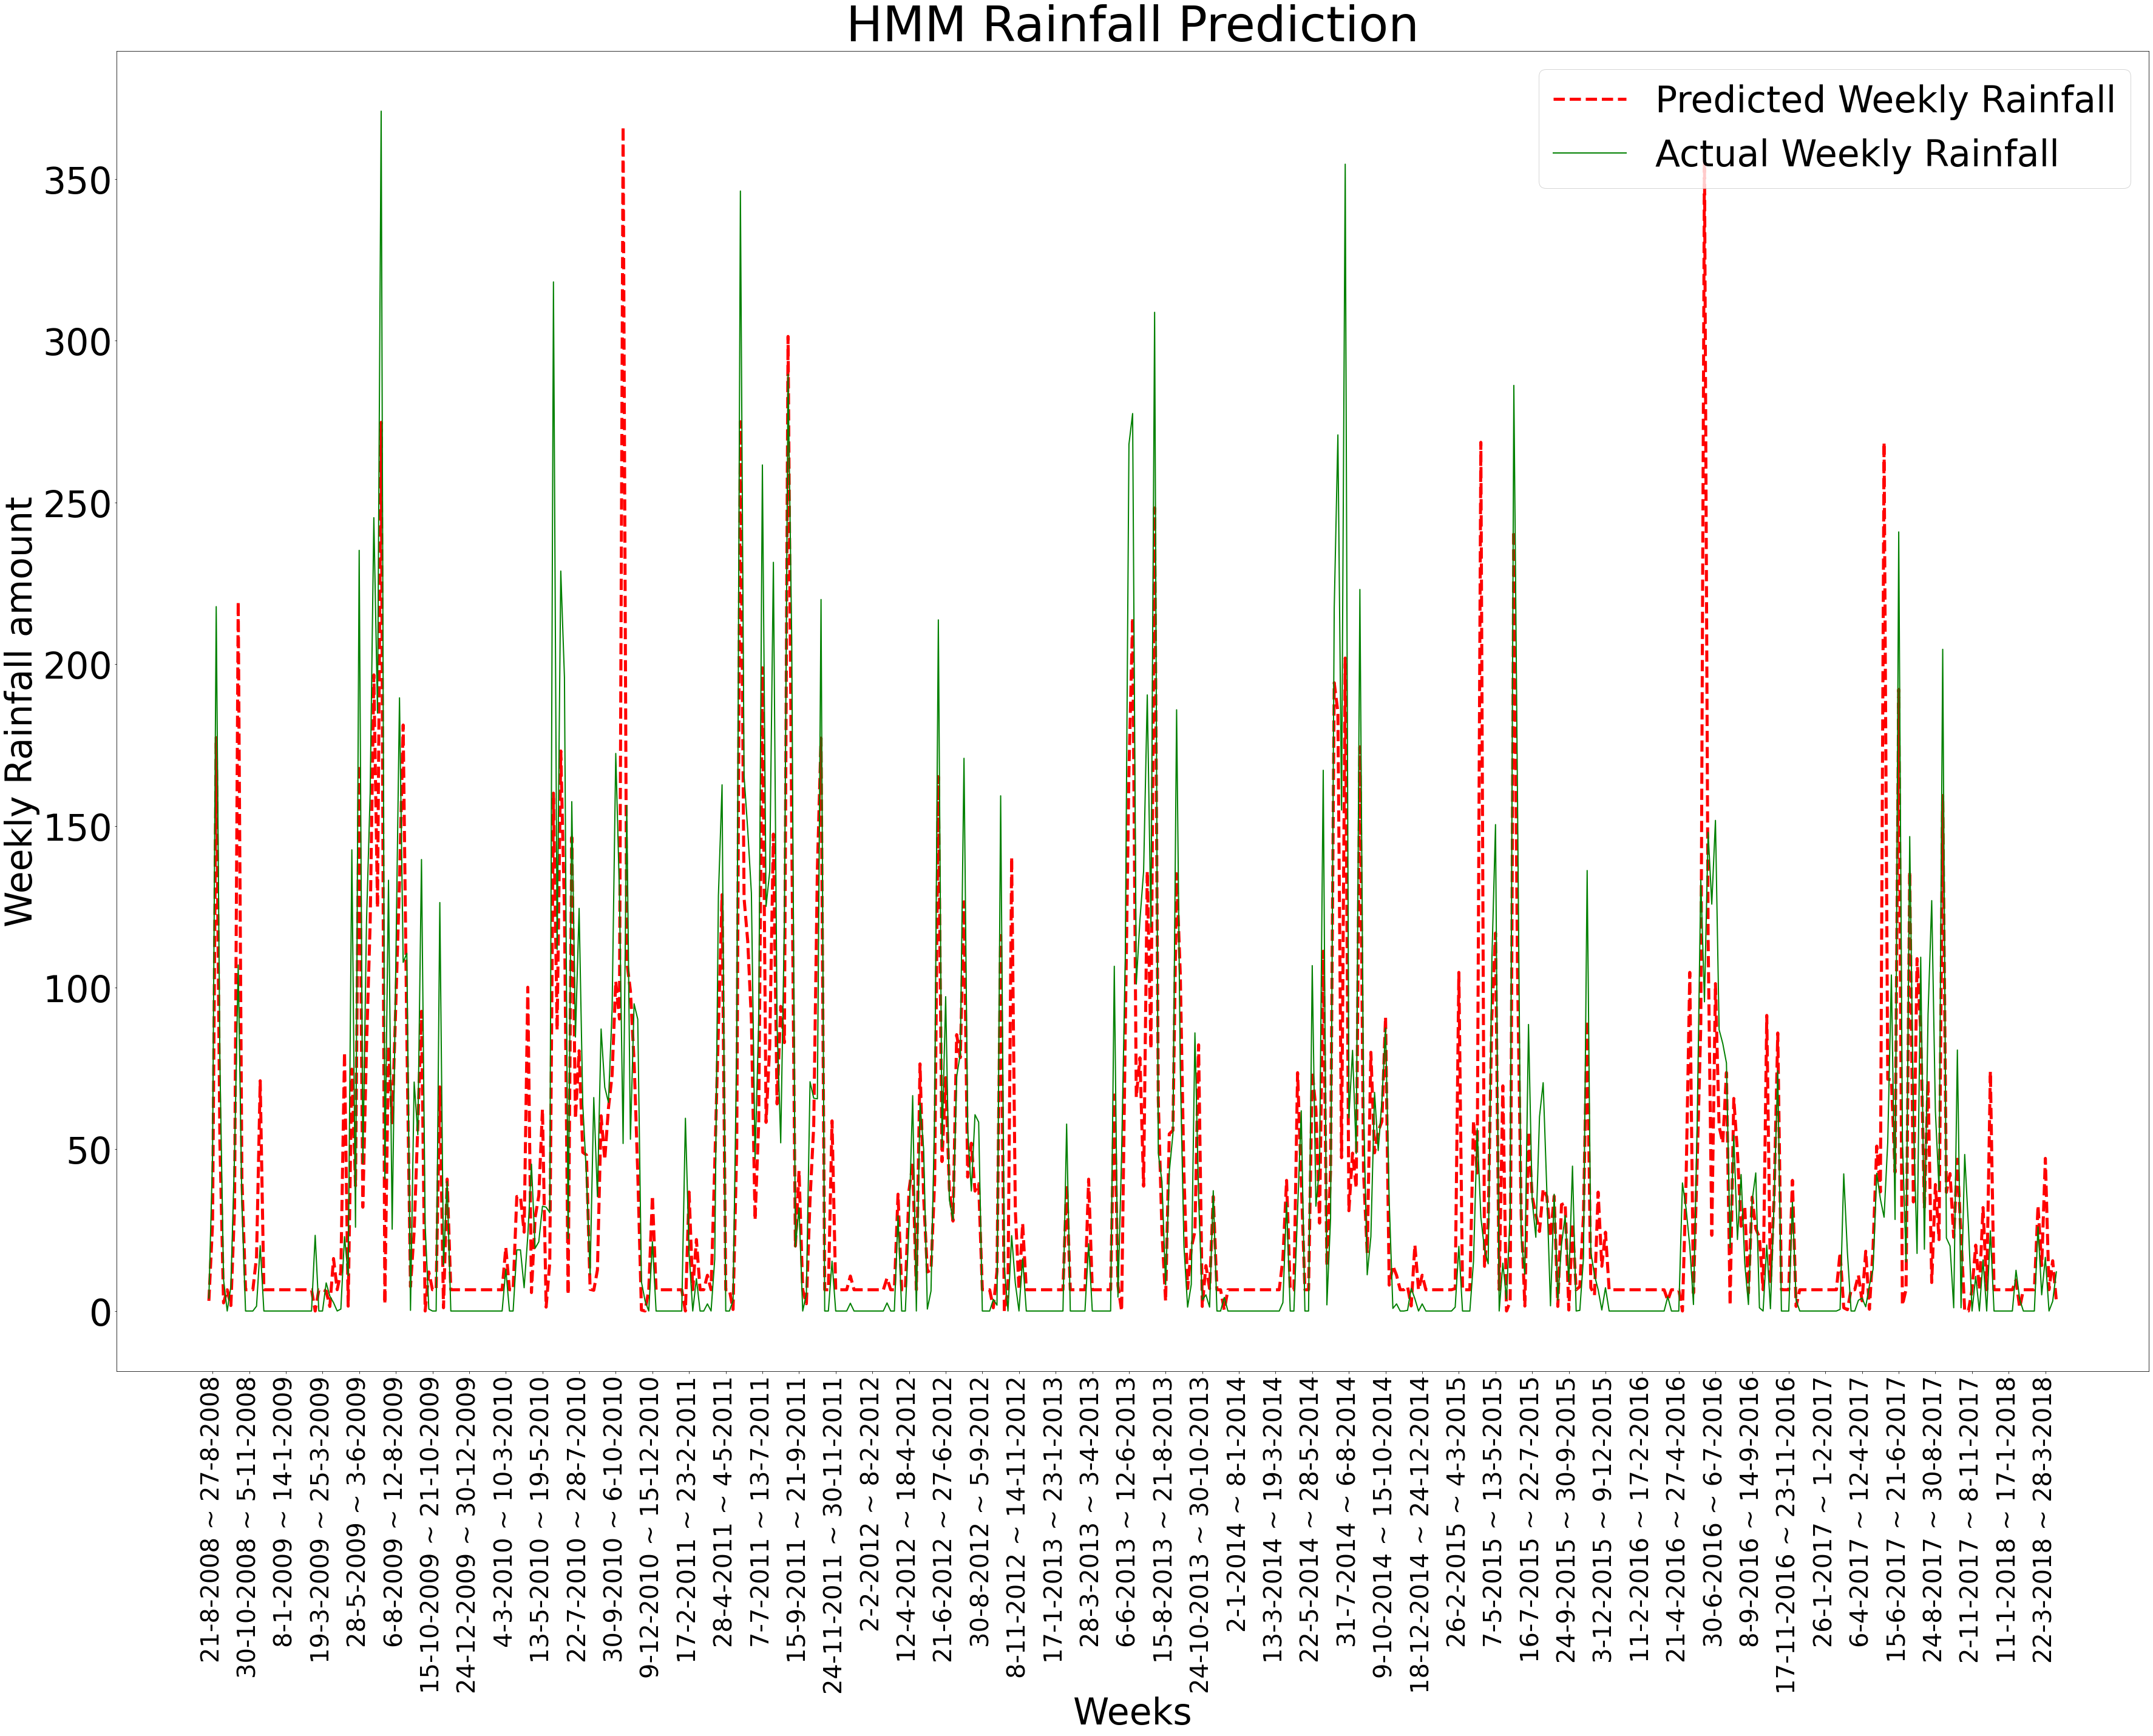

In [198]:
f = plt.figure() 
f.set_figwidth(60) 
f.set_figheight(40)
plt.title('HMM Rainfall Prediction', fontsize = 80)
plt.xticks(fontsize=40, rotation=90)
plt.yticks(fontsize=60, rotation=0)
plt.xticks(ticks,xaxis)
plt.ylabel('Weekly Rainfall amount',fontsize=60)
plt.xlabel('Weeks',fontsize=60)
plt.plot(p2, 'r', linestyle='--', linewidth='5', label = 'Predicted Weekly Rainfall')
plt.plot(T1, 'g',linestyle='-', linewidth='2', label = 'Actual Weekly Rainfall')
plt.legend(loc='best',prop={'size': 60})

In [199]:
mean_squared_error(p2, T1, squared=False)

38.09592662146495

In [200]:
mae(p2,T1)

21.473412881587024

In [201]:
d1 = np.array(T1)
d1 = np.reshape(d1 , d1.shape[0])
d2 = np.array(p2)
d2 = np.reshape(d2 , d2.shape[0])
corr, _ = pearsonr(d1, d2)
corr

0.8194840279336623

In [140]:
test_lbl = np.floor(T1/66)
test_lbl = [max(0,int(i[0])) for i in test_lbl]
pred_lbl = np.floor(p2/66)
pred_lbl = [max(0,int(i)) for i in pred_lbl]


In [141]:
max(test_lbl)

5

In [142]:
CM = confusion_matrix(test_lbl, pred_lbl)
CM

array([[378,  16,   2,   0,   2,   1],
       [ 23,  29,   1,   1,   0,   1],
       [  2,  21,   5,   0,   0,   0],
       [  0,   0,  12,   1,   0,   0],
       [  0,   0,   3,   3,   1,   0],
       [  0,   0,   0,   1,   2,   0]])

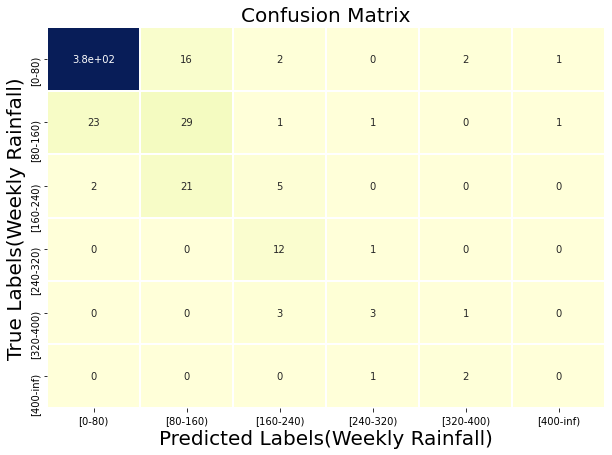

In [143]:



df_cm = pd.DataFrame(CM, index = [i for i in inter],
                  columns = [i for i in inter])
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True,cmap="YlGnBu",cbar=False, linewidths=1)
plt.title('Confusion Matrix', fontsize =20)
plt.xlabel("Predicted Labels(Weekly Rainfall)",fontsize =20)
plt.ylabel("True Labels(Weekly Rainfall)", fontsize =20)
plt.show()

In [1072]:
# import pickle
# import numpy as np
# from hmmlearn import hmm


# class GmmHmmForecast:
#     """
#     GMM-HMM forecasting model based on the paper:
#     "Stock Market Prediction Using Hidden Markov Model
#     Aditya Gupta, Non-Student Member, IEEE and Bhuwan Dhingra,
#     Non-Student member, IEEE"
#     links:
#     - https://ieeexplore.ieee.org/document/6199099
#     - http://www.cs.cmu.edu/~bdhingra/papers/stock_hmm.pdf
#     """

#     @staticmethod
#     def load(modelLoadPath):
#         """
#         Loads the model from the provided filepath

#         :param modelLoadPath: path from where to load the model
#         :return: model which is loaded from the given path
#         """

#         model = GmmHmmForecast(
#             None, None, None,
#             loadModel=True
#         )

#         with open(modelLoadPath, 'rb') as fl:
#             loadDict = pickle.load(fl)

#         model.model = loadDict['model']
#         model.dimension = loadDict['dimension']
#         model.d = loadDict['d']

#         return model

#     def __init__(
#             self,
#             numStates,
#             numMixtureComp,
#             dimension,
#             d=10,
#             numIterations=10,
#             threshold=1e-7,
#             covariance_type='full',
#             verbose=False,
#             loadModel=False
#     ):
#         """
#         Initialize GMM-HMM model using the provided parameters, note that
#         the training information has to be provided during the now itself,
#         and the train function then has to be called exactly once

#         :param numStates: number of states of the HMM
#         :param numMixtureComp: number of mixture components present in
#         each of the emission probabilities
#         :param dimension: dimension of the observations
#         :param d: number of timesteps to use for forecasting the next
#         observation at the next timestep. This is called 'latency'
#         :param numIterations: number of iterations of training to be
#         performed
#         :param threshold: value such that the training procedure
#         is said to have converged if the increase in log likelihood
#         is lesser than this value
#         :param covariance_type: type of covariance matrix to use
#         for the mixture components of the GMM emission distribution
#         :param verbose: if True, then display training info, else
#         do not display training info (training info: log likelihood
#         at each iteration)
#         :param loadModel: True or False - do not use this parameter !,
#         this is for internal use only (i.e. it is an implementation detail)
#         If True, then object is normally created, else object is created
#         without any member values being created. This is used when model
#         is created by the static load method
#         """

#         if loadModel:
#             return

#         self.model = hmm.GMMHMM(
#             n_components=numStates,
#             n_mix=numMixtureComp,
#             covariance_type=covariance_type,
#             n_iter=numIterations,
#             tol=threshold,
#             verbose=verbose
#         )

#         self.dimension = dimension
#         self.d = d

#     def train(self, trainSequences):
#         """
#         Train the model on the provided training sequences. This
#         function is to be called exactly once.

#         :param trainSequences: list of numpy arrays of shape (ni, dimension),
#         where each numpy array can represents an observation sequence. Hence,
#         each numpy array can have any length (axis 0) but has to have exactly
#         'dimension' as the dimension of axis 1
#         :return: list of log likelihood values corresponding to each iteration
#         """

#         X = np.concatenate(trainSequences, axis=0)
#         assert X.shape[1] == self.dimension
#         lengths = [seq.shape[0] for seq in trainSequences]

#         self.model.fit(X=X, lengths=lengths)

#         return list(self.model.monitor_.history)

#     def predict(self, X, discParamSet, returnMaxLikelihood=False):
#         """
#         Forecast using the model parameters on the provided input data. A thing
#         to note is that only the last prediction is useful, since one already
#         has the true observations for the predictions made by this function, but
#         this allows one to see the performance of this algorithm.

#         :param X: observation sequence, it is a numpy array of shape (n, dimension)
#         :param discParamSet: for each of the 'dimension' number of components in
#         an observation, there should be a numpy array of containing the discrete
#         set of allowed values for that value i.e. for the ith component of the
#         observation vector, discParamSet[i] is a 1D python list or numpy array
#         of shape (ni,) containing all the values from which we predict this ith
#         component.
#         :param returnMaxLikelihood: if True, our return value is
#         (pred, maxLikelihoodValues), i.e. all the predictions, and the log
#         likelihood of each prediction. if False, then our return value is
#         just the predictions numpy array.
#         :return: prediction of the value following every 'd' length
#         contiguous subsequence of the provided observation sequence. Hence,
#         the predictions numpy array 'pred' has shape (n - d, dimension).
#         """

#         assert X.shape[1] == self.dimension
#         assert len(discParamSet) == self.dimension

#         pred = []
#         maxLikelihoodValues = [] if returnMaxLikelihood else None

#         for t in range(self.d, X.shape[0]):
#             # Construct observations using [t-d..t] i.e. current timestep is
#             # excluded, since we would be predicting the current timestep
#             x = np.concatenate(
#                 (X[t - self.d: t], np.zeros((1, self.dimension))),
#                 axis=0
#             )

#             obs, maxLikelihood = self.getMostLikelyObs(x, discParamSet, 0)
#             pred.append(obs)

#             if returnMaxLikelihood:
#                 maxLikelihoodValues.append(maxLikelihood)

#         pred = np.array(pred)

#         if returnMaxLikelihood:
#             return pred, maxLikelihoodValues
#         else:
#             return pred

#     def save(self, modelSavePath):
#         """
#         Save the model at the provided filepath

#         :param modelSavePath: path where to store the model
#         """

#         saveDict = {
#             'model': self.model,
#             'dimension': self.dimension,
#             'd': self.d
#         }

#         with open(modelSavePath, 'wb') as fl:
#             pickle.dump(saveDict, fl)

#     def getMostLikelyObs(self, x, discParamSet, idx):
#         """
#         This is a helper function (do not directly call it!). This
#         function assumes that among the 'dimension' many components
#         of the dth (0-based) observation in x, idx many components have
#         been given their values, and all the previous (0..d-1)
#         observation vectors in x have also been given their value, now
#         we want to compute the most optimal set of values for observation
#         components idx..dimension-1, by most optimal we mean values
#         for idx..dimension-1 component of x[d] which gives highest log
#         likelihood value of the sequence x(0)..x(d).


#         :param x: observation sequence, it is a numpy array of shape
#         (d + 1, dimension), we want to set the most optimal value of
#         x[d + 1, idx : dimension]
#         :param discParamSet: for each of the 'dimension' number of components in
#         an observation, there should be a numpy array of containing the discrete
#         set of allowed values for that value i.e. for the ith component of the
#         observation vector, discParamSet[i] is a 1D python list or numpy array
#         of shape (ni,) containing all the values from which we predict this ith
#         component.
#         :param idx: index of the component of x[d] whose value we are going to
#         fix now, and recursively fix values of components idx+1 .. dimension-1
#         such that they yield maximum likelihood
#         :return: a 2-tuple containing (chosen observation, likelihood of the
#         chosen observation), the chosen observation has maximum likelihood
#         given that we are allowed to vary ony these: x[d + 1, idx : dimension]
#         (rest all are fixed)
#         """

#         if idx == len(discParamSet):
#             return x[self.d].copy(), self.model.score(x)

#         chosenObs = None
#         maxLikelihood = None

#         for paramValue in discParamSet[idx]:
#             x[self.d, idx] = paramValue

#             currObs, currLikelihood = \
#                 self.getMostLikelyObs(x, discParamSet, idx + 1)

#             if maxLikelihood is None or currLikelihood > maxLikelihood:
#                 maxLikelihood = currLikelihood
#                 chosenObs = currObs

#         return chosenObs, maxLikelihood


In [1073]:
# numStates = 6
# numMixtureComp = 3
# dimension = 1
# numIterations = 200
# threshold = 0.0
# covariance_type = 'full'
# verbose = True

In [1074]:
# model2 = GmmHmmForecast(
#     numStates=numStates,
#     numMixtureComp=numMixtureComp,
#     dimension=dimension,
#     numIterations=numIterations,
#     threshold=threshold,
#     covariance_type=covariance_type,
#     verbose = True)

In [1075]:
# logLikelihoodValues2 = model2.train([Train])

In [1076]:
# plt.plot(logLikelihoodValues2, label='log-likelihood')
# plt.xlabel('Iters')
# plt.ylabel('Log-likelihood')
# plt.title('Log-likelihood vs. Iters')
# print('Has model converged: ', model2.model.monitor_.converged)

In [1077]:
# pred2 = model2.predict(Test , discParamSet)

In [1078]:
# import numpy as np


# class Pso:

#     @staticmethod
#     def computeInitialPos(
#             paramRange,
#             numParticles
#     ):
#         """
#         Compute initial positions of particles by sampling for each
#         component of each particle from the uniform distribution
#         with end points specified for each component as an argument
#         taken by this function.

#         :param paramRange: list of 2-tuples (low, high) of length equal
#         to the dimension of the parameter space. There should be a
#         tuple for every dimension. Hence, for dimension d, the tuple
#         (low, high) says that each particle position's dth component must
#         be sampled from uniform(low, high).
#         :param numParticles: number of particles
#         :return: initial position matrix of shape (numParticles, dimension)
#         containing initial position vectors for each particle.
#         """

#         dim = len(paramRange)
#         initialPos = np.zeros((numParticles, dim))

#         for d in range(dim):
#             low, high = paramRange[d]
#             initialPos[:, d] = np.random.uniform(low, high, (numParticles,))

#         return initialPos

#     @staticmethod
#     def pso(
#             minFunc,
#             initialPos,
#             inertiaCoeff=1,
#             inertiaDamp=0.99,
#             personalCoeff=2,
#             socialCoeff=2,
#             numIterations=20
#     ):
#         """
#         Particle Swarm Optimization algorithm

#         :param minFunc: function which is to be minimized. It must
#         accept a numpy array of shape (dim,) where dim is the dimension
#         of the parameter space
#         :param initialPos: initial positions for each of the particles.
#         It should be a numpy array of shape (numParticles, dim)
#         :param inertiaCoeff: coefficient used for updating the velocity
#         based on previous velocity
#         :param inertiaDamp: used for damping inertia coefficient after
#         every iteration.
#         :param personalCoeff: coefficient used for updating the velocity
#         based on personal best
#         :param socialCoeff: coefficient used for updating the velocity
#         based on global best
#         :param numIterations: number of iterations to be performed
#         :return: (optimized parameters,
#             optimal value of the function,
#             global best cost values at each iteration),
#         where the optimized parameters is a numpy array of shape (dim,)
#         and optimal value is the value of the function achieved by these
#         parameters
#         """

#         numParticles, dim = initialPos.shape

#         pos = initialPos.copy()
#         vel = np.zeros(pos.shape)

#         bestPos = initialPos.copy()
#         bestCosts = np.zeros((numParticles,))
#         bestParticle = None

#         for i in range(numParticles):
#             bestCosts[i] = minFunc(pos[i])
#             bestParticle = i if bestParticle is None \
#                 or bestCosts[i] < bestCosts[bestParticle] else bestParticle

#         iterBestCosts = np.zeros((numIterations,))
#         for iterNum in range(numIterations):

#             vel = inertiaCoeff * vel \
#                 + personalCoeff * np.random.rand(numParticles, dim) * (bestPos - pos) \
#                 + (socialCoeff * np.random.rand(numParticles, dim)
#                     * (np.expand_dims(bestPos[bestParticle], axis=0) - pos))

#             pos = pos + vel

#             for i in range(numParticles):
#                 currValue = minFunc(pos[i])

#                 if currValue < bestCosts[i]:
#                     bestCosts[i] = currValue
#                     bestPos[i, :] = pos[i, :]

#                     if currValue < bestCosts[bestParticle]:
#                         bestParticle = i

#             iterBestCosts[iterNum] = bestCosts[bestParticle]
#             inertiaCoeff *= inertiaDamp

#         return bestPos[bestParticle], bestCosts[bestParticle], iterBestCosts

#     @staticmethod
#     def psoConstrictionCoeff(
#             minFunc,
#             initialPos,
#             kappa=1,
#             phi1=2.05,
#             phi2=2.05,
#             numIterations=20
#     ):
#         """
#         PSO algorithm with the addition of constriction coefficients.
#         This eliminates the use of damping for the inertia coefficient.

#         :param minFunc: function which is to be minimized. It must
#         accept a numpy array of shape (dim,) where dim is the dimension
#         of the parameter space
#         :param initialPos: initial positions for each of the particles.
#         It should be a numpy array of shape (numParticles, dim)
#         :param kappa: the kappa constriction coefficient. It should
#         be in [0, 1]
#         :param phi1: the phi1 constriction coefficient. phi1 + phi2
#         must be greater than or equal to 2
#         :param phi2: the phi2 constriction coefficient. phi1 + phi2
#         must be greater than or equal to 2
#         :param numIterations: number of iterations to be performed
#         :return: (optimized parameters,
#             optimal value of the function,
#             global best cost values at each iteration),
#         where the optimized parameters is a numpy array of shape (dim,)
#         and optimal value is the value of the function achieved by these
#         parameters
#         """

#         phi = phi1 + phi2
#         chi = 2 * kappa / np.abs(2 - phi - np.sqrt(phi * phi - 4 * phi))

#         inertiaCoeff = chi
#         inertiaDamp = 1
#         personalCoeff = chi * phi1
#         socialCoeff = chi * phi2

#         return Pso.pso(
#             minFunc,
#             initialPos,
#             inertiaCoeff,
#             inertiaDamp,
#             personalCoeff,
#             socialCoeff,
#             numIterations
#         )




In [1079]:
# int_pos = Pso.computeInitialPos([(0,500)], 10)
# rf = 0;

# def cst(x):
#     temp = np.append(rf, x)
#     temp = np.reshape(temp , (d,1))
#     scr = remodel.score(temp)
#     return scr

# def PSO_HMM():
#     params, bestCost, bestCosts = Pso.pso(cst, int_pos)
#     print(bestCost)
#     return params[0]
    

In [1080]:
# pred = []
# for i in range(0,len(NN)-d+1,1):
#     rf = NN[i:i+d-1]
#     #print(rf)
#     obs = PSO_HMM()
#     pred.append(obs)

# MLP

### setup data

In [1081]:
# from sklearn.preprocessing import StandardScaler
# Data = (np.array(data))
# Data = np.reshape(Data , (Data.shape[0],1))

# scaler = StandardScaler()
# Data = scaler.fit_transform(Data)



In [1082]:
# U = [min(Data), max(Data)]
# Data = (Data - U[0])/(U[1] - U[0])
# #scaler = StandardScaler()
# #Data = scaler.fit_transform(Data)
# plt.plot(Data)

In [1083]:
# slt = int(0.80*len(data))
# Tr = Data[:slt]
# Tst = Data[slt:]

In [1084]:
# lag = 5

In [1085]:
# model = Sequential()
# model.add(Dense(8, input_dim=lag, activation='relu'))
# model.add(Dense(64, activation='relu'))
# model.add(Dense(512, activation='relu'))
# #model.add(Dropout(0.2))
# #model.add(Dense(1024, activation='relu'))
# #model.add(Dropout(0.2))
# #model.add(Dense(512, activation='relu'))
# model.add(Dense(64, activation='relu'))
# model.add(Dense(8, activation='relu'))
# model.add(Dense(1))

# model.compile(loss='mse', optimizer='adam', metrics=['mae'])

# model.summary()

In [1086]:
# Tr_inp_data = []
# Tr_out_data = []



# for i in range(lag, len(Tr)):
#     Tr_inp_data.append(Tr[i - lag: i])
#     Tr_out_data.append(Tr[i])

# Tr_inp_data = np.array(Tr_inp_data)
# Tr_inp_data = np.reshape(Tr_inp_data , Tr_inp_data.shape[0:2])
# Tr_out_data = np.array(Tr_out_data)#[:, np.newaxis]

# print(
#     f'Input Data Shape {Tr_inp_data.shape} \n'
#     + f'Output Data Shape {Tr_out_data.shape}'
# )

In [1087]:
#history = model.fit(Tr_inp_data, Tr_out_data, epochs=500, batch_size=10)

In [1088]:
# # "Loss"
# plt.plot(history.history['loss'])
# #plt.plot(history.history['val_loss'])
# plt.title('model loss')
# plt.ylabel('loss')
# plt.xlabel('epoch')
# plt.legend(['train'], loc='upper left')
# plt.show()

In [1089]:
# #xaxis2 = ['Week#'+str(i) for i in range(1,2017,15)]
# ticks2 = [i+1 for i in range(1,2017,15)]

In [1090]:
# true_output = Tr_out_data
# pred_output = model.predict(Tr_inp_data)

# true = scaler.inverse_transform(true_output)
# pred = scaler.inverse_transform(pred_output)

# #true = true_output*(U[1] - U[0]) + U[0]
# #pred = pred_output*(U[1] - U[0]) + U[0]

# f = plt.figure() 
# f.set_figwidth(60) 
# f.set_figheight(40)
# plt.title('MLP Rainfall Prediction', fontsize = 80)
# plt.xticks(fontsize=40, rotation=0)
# plt.yticks(fontsize=60, rotation=0)
# #plt.xticks(ticks2,xaxis2)
# plt.ylabel('Weekly Rainfall amount',fontsize=60)
# plt.xlabel('Week number',fontsize=60)
# plt.plot(pred, 'r', linestyle='--', linewidth='5', label = 'Predicted Weekly Rainfall')
# plt.plot(true, 'g',linestyle='-', linewidth='2', label = 'Actual Weekly Rainfall')
# plt.legend(loc='best',prop={'size': 60})

In [1091]:
#new_Test = np.concatenate([Tr[-lag+1:] , Tst])

In [1092]:
#ticks2 = [i+1 for i in range(1,2017,15)]

In [1093]:
# Tst_inp_data = []
# Tst_out_data = []



# for i in range(lag, len(Tst)):
#     Tst_inp_data.append(new_Test[i - lag: i])
#     Tst_out_data.append(new_Test[i])

# Tst_inp_data = np.array(Tst_inp_data)
# Tst_inp_data = np.reshape(Tst_inp_data , Tst_inp_data.shape[0:2])
# Tst_out_data = np.array(Tst_out_data)#[:, np.newaxis]

# print(
#     f'Input Data Shape {Tst_inp_data.shape} \n'
#     + f'Output Data Shape {Tst_out_data.shape}'
# )

In [1094]:
# true_output = Tst_out_data
# pred_output = model.predict(Tst_inp_data)

# true = scaler.inverse_transform(true_output)
# pred = scaler.inverse_transform(pred_output)

# #true = true_output*(U[1] - U[0]) + U[0]
# #pred = pred_output*(U[1] - U[0]) + U[0]

# f = plt.figure() 
# f.set_figwidth(60) 
# f.set_figheight(40)
# plt.title('MLP Rainfall Prediction', fontsize = 80)
# plt.xticks(fontsize=40, rotation=315)
# plt.yticks(fontsize=60, rotation=0)
# plt.xticks(ticks,xaxis)
# plt.ylabel('Weekly Rainfall amount',fontsize=60)
# plt.xlabel('Weeks',fontsize=60)
# plt.plot(pred, 'r', linestyle='--', linewidth='5', label = 'Predicted Weekly Rainfall')
# plt.plot(true, 'g',linestyle='-', linewidth='2', label = 'Actual Weekly Rainfall')
# plt.legend(loc='best',prop={'size': 60})

In [1095]:
#mean_squared_error(true, pred, squared=False)

In [1096]:
#mae(true,pred)

In [1097]:
# d1 = np.array(true)
# d1 = np.reshape(d1 , d1.shape[0])
# d2 = np.array(pred)
# d2 = np.reshape(d2 , d2.shape[0])
# corr, _ = pearsonr(d1, d2)
# corr

In [1098]:
# test_lbl = np.floor(true/80)
# test_lbl = [int(i[0]) for i in test_lbl]
# pred_lbl = np.floor(pred/80)
# pred_lbl = [max(0,int(i)) for i in pred_lbl]

In [1099]:
# inter = ['[0-80)','[80-160)','[160-240)','[240-320)','[320-inf)']

In [1100]:
# CM = confusion_matrix(test_lbl, pred_lbl)
# CM

In [1101]:
# df_cm = pd.DataFrame(CM, index = [i for i in inter],
#                   columns = [i for i in inter])
# plt.figure(figsize = (10,7))
# sn.heatmap(df_cm, annot=True,cmap="YlGnBu",cbar=False, linewidths=1)
# plt.title('Confusion Matrix', fontsize =20)
# plt.xlabel("Predicted Labels(Weekly Rainfall)",fontsize =20)
# plt.ylabel("True Labels(Weekly Rainfall)", fontsize =20)
# plt.show()

# Testing

In [202]:
df_tst = pd.read_csv("Daily_data.csv")

In [203]:
df_tst = df_tst.drop(['1'], axis = 1) 

In [204]:
df_tst

,Date,2018,2019,2020
0,Jun-01,0.0,4.4,2.7
1,Jun-02,0.0,0.0,4.7
2,Jun-03,0.9,0.4,8.2
3,Jun-04,25.6,0.2,7.9
4,Jun-05,10.9,0.0,21.6
...,...,...,...,...
117,Sep-26,2.9,5.7,2.8
118,Sep-27,1.0,1.7,0.8
119,Sep-28,7.3,0.5,2.6
120,Sep-29,27.5,0.0,0.9


In [205]:
dt = df_tst['2018']

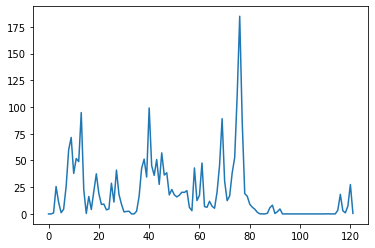

In [206]:
plt.plot(dt)

In [220]:
tst_RF = []
latency = 7
Dates = []
for i in range(0,len(df_tst)-latency,latency):
    tst_RF.append(np.sum(df_tst['2018'][i:i+latency]))
    S1 = str(df_tst['Date'][i])
    S2 = str(df_tst['Date'][i+latency-1])
    Dates.append(S1[:-2] + "["+S1[-2:] +"-"+ S2[-2:]+"]")

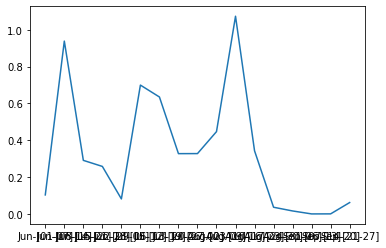

In [221]:
tst_RF = np.array(tst_RF)
tst_RF = np.reshape(tst_RF , (tst_RF.shape[0],1))
tst_RF_n = (tst_RF - U[0])/(U[1] - U[0])
plt.plot(Dates,tst_RF_n)

In [222]:
# inp_data = []
# out_data = []


# for i in range(lag, len(tst_RF_n)):
#     inp_data.append(tst_RF_n[i - lag: i])
#     out_data.append(tst_RF_n[i])

# inp_data = np.array(inp_data)
# inp_data = np.reshape(inp_data , inp_data.shape[0:2])
# out_data = np.array(out_data)#[:, np.newaxis]

# print(
#     f'Input Data Shape {inp_data.shape} \n'
#     + f'Output Data Shape {inp_data.shape}'
# )

In [223]:
# true_output = out_data
# pred_output = model.predict(inp_data)

# true = scaler.inverse_transform(true_output)
# pred = scaler.inverse_transform(pred_output)

# plt.figure(figsize=(20,10))
# plt.plot(true, label='true data')
# plt.plot(pred, label='predicted data')

# plt.xlabel('Timesteps')
# plt.ylabel('Values')
# plt.legend()
# plt.title('True and Pred Data (On normal)')
# plt.show()

In [224]:
pred = model3.predict(tst_RF_n,1830)
p2 = pred*(U[1] - U[0]) + U[0]
T1 = tst_RF_n*(U[1] - U[0]) + U[0]

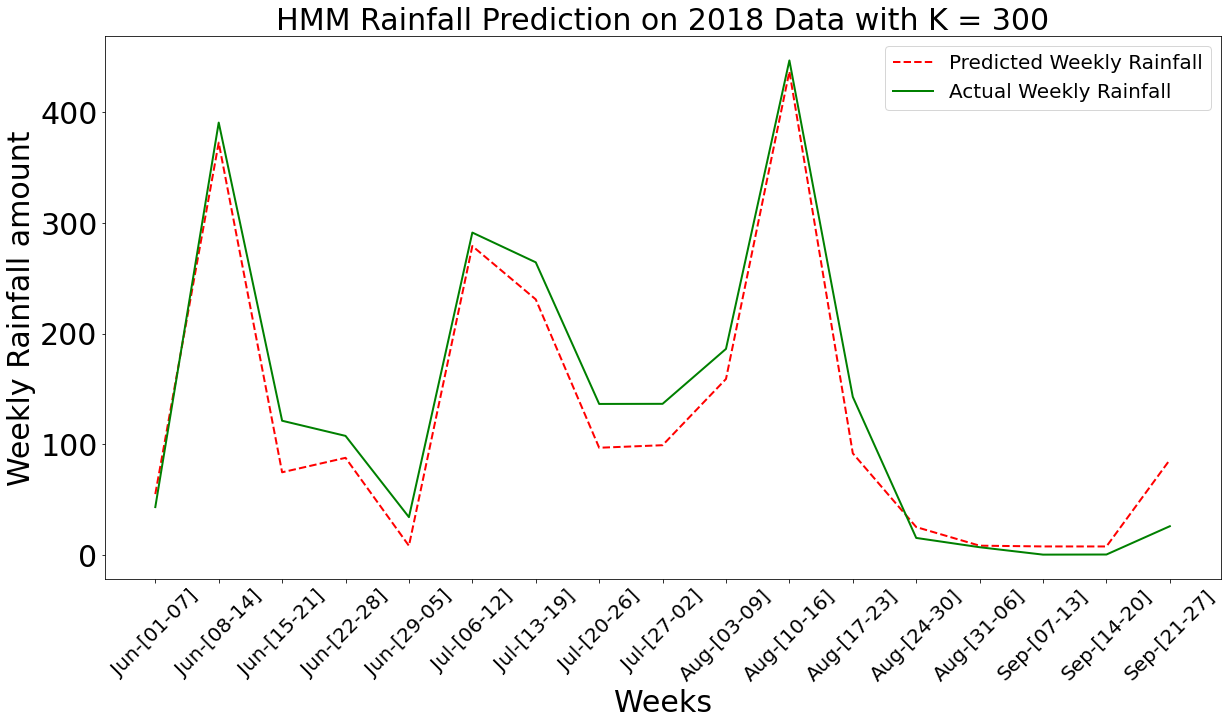

In [225]:
f = plt.figure() 
f.set_figwidth(20) 
f.set_figheight(10)
plt.title('HMM Rainfall Prediction on 2018 Data with K = 300', fontsize = 30)
plt.xticks(fontsize=20, rotation=45)
plt.yticks(fontsize=30, rotation=0)
#plt.xticks(ticks,xaxis)
plt.ylabel('Weekly Rainfall amount',fontsize=30)
plt.xlabel('Weeks',fontsize=30)
plt.plot(Dates,p2, 'r', linestyle='--', linewidth='2', label = 'Predicted Weekly Rainfall')
plt.plot(T1, 'g',linestyle='-', linewidth='2', label = 'Actual Weekly Rainfall')
plt.legend(loc='best',prop={'size': 20})

In [226]:
mean_squared_error(T1, p2, squared=False)

29.914594120524615

In [227]:
mae(T1,p2)

24.659683793555214

In [228]:
d1 = np.array(T1)
d1 = np.reshape(d1 , d1.shape[0])
d2 = np.array(p2)
d2 = np.reshape(d2 , d2.shape[0])

corr, _ = pearsonr(d1, d2)
corr

0.9803187099539282

In [1126]:
pred = model.predict(tst_RF_n)
p2 = pred*(U[1] - U[0]) + U[0]
T1 = tst_RF_n*(U[1] - U[0]) + U[0]

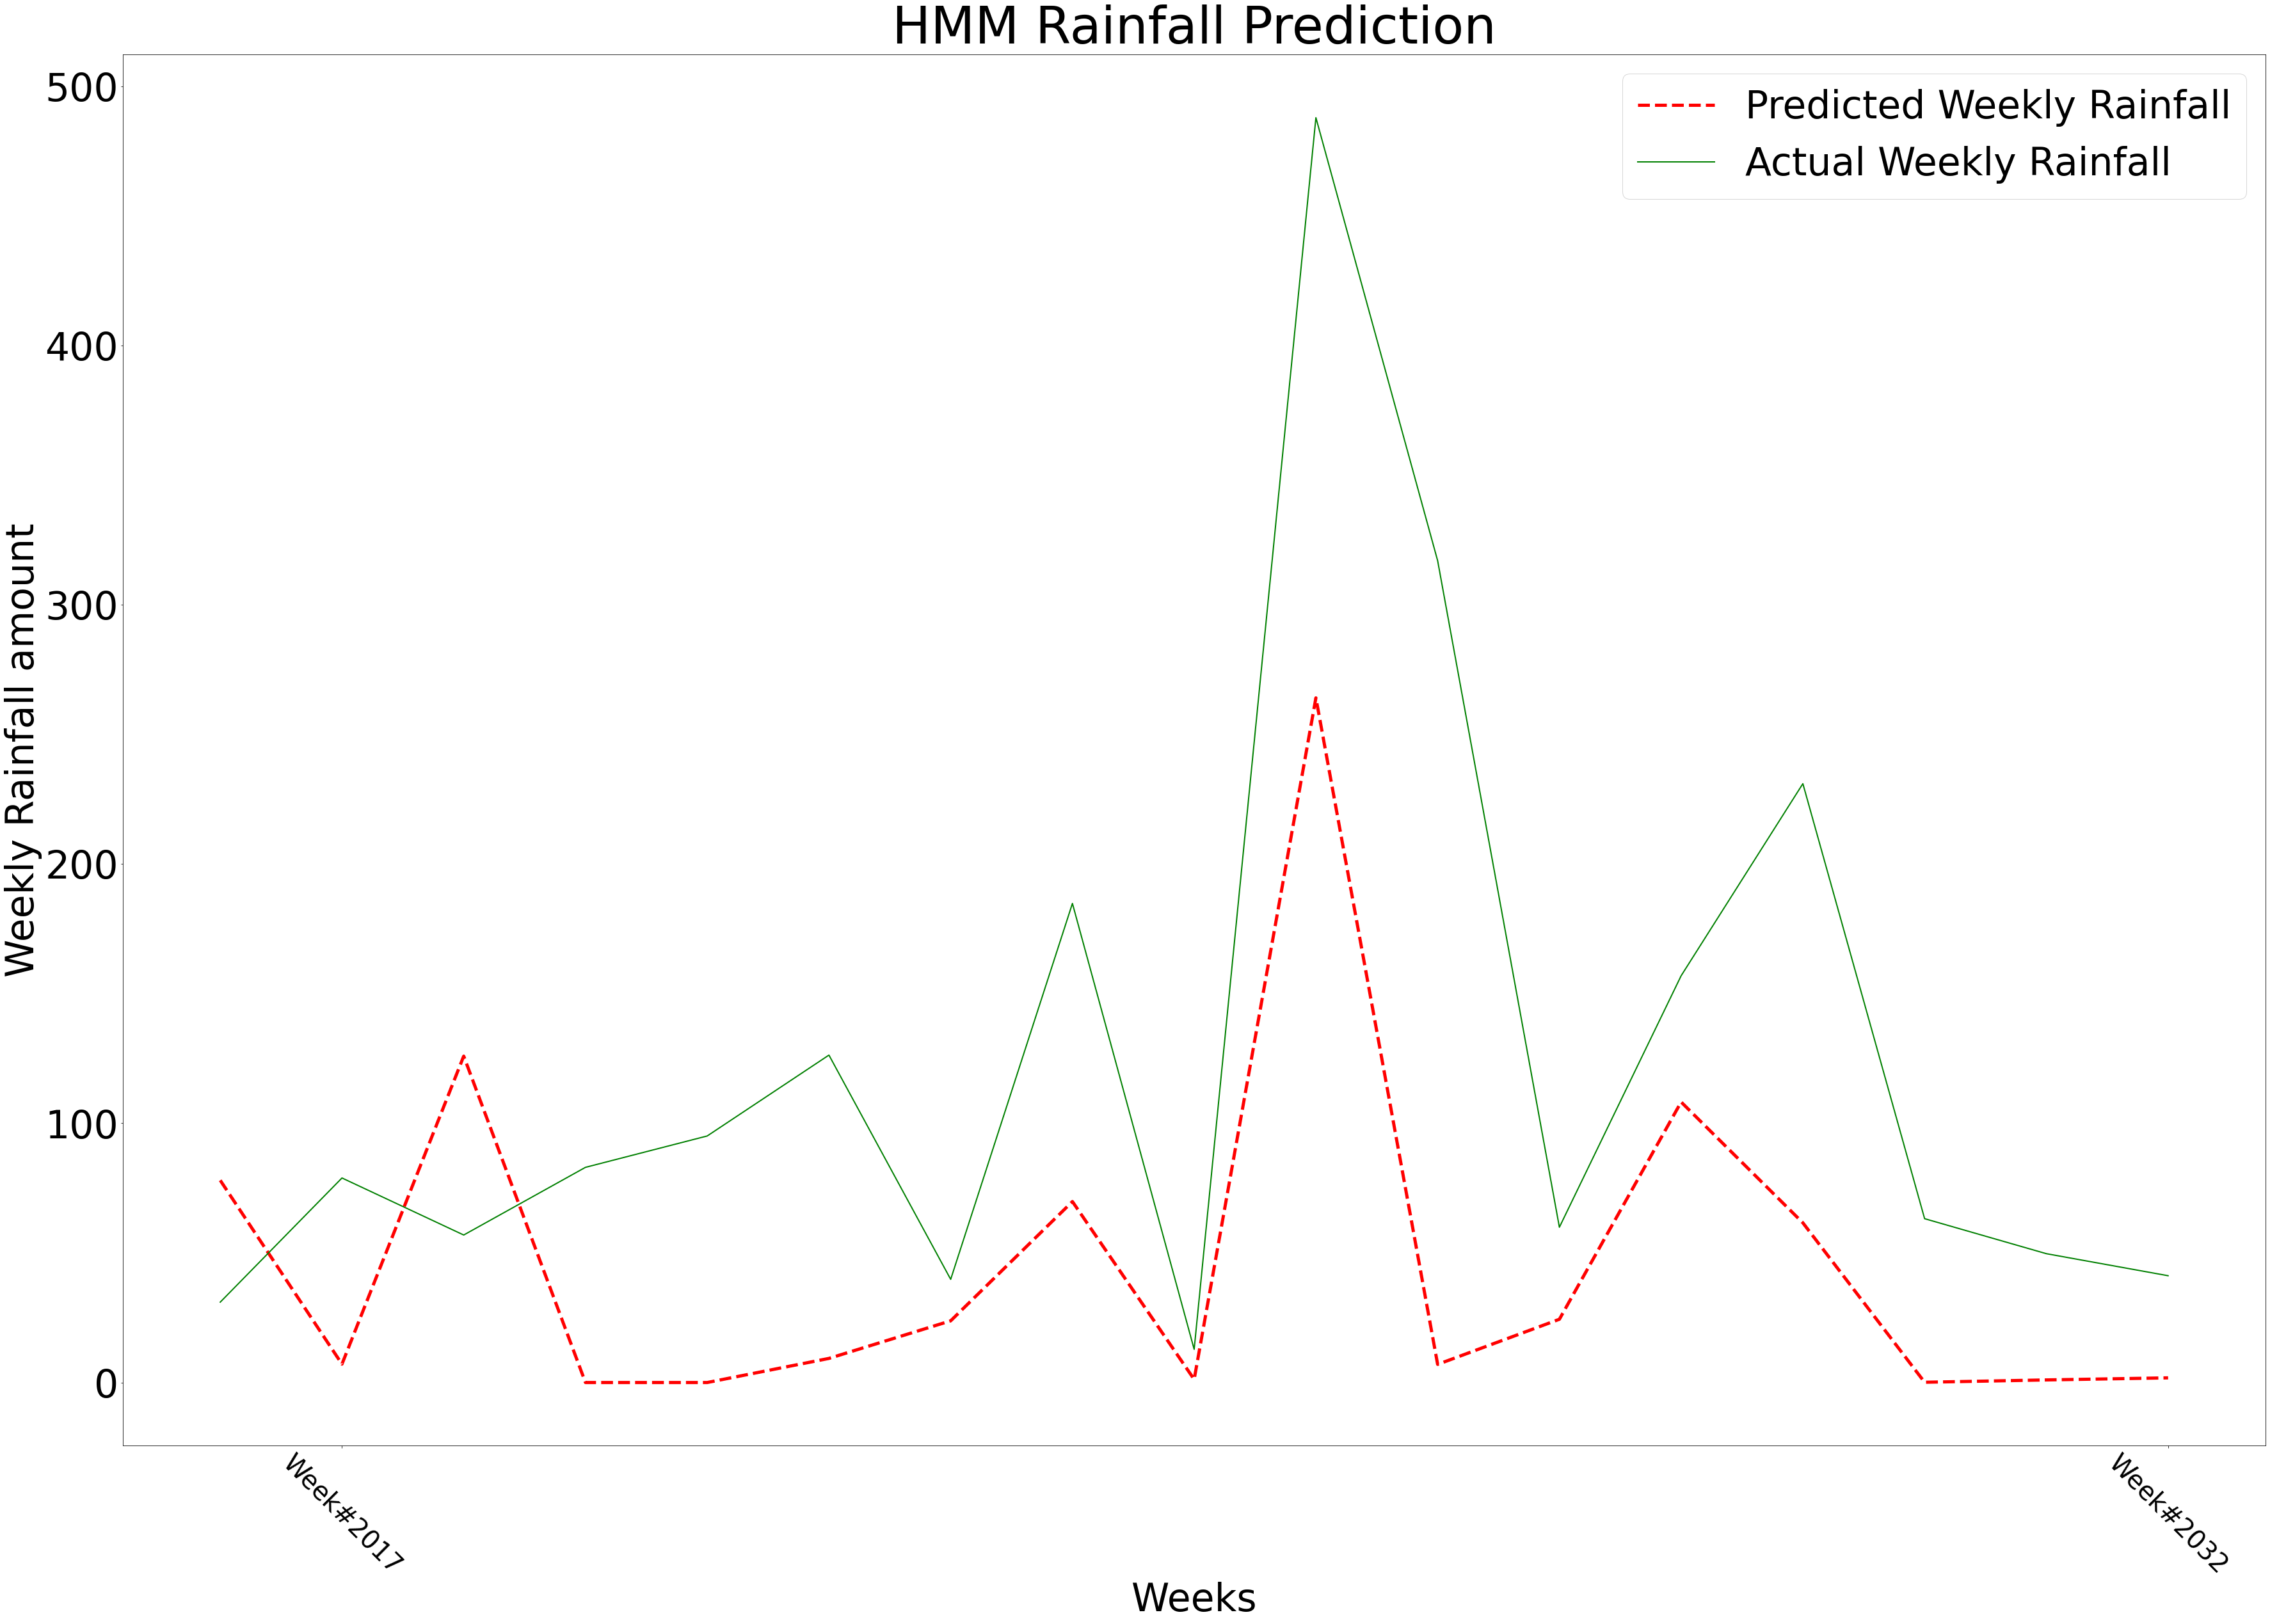

In [1127]:
f = plt.figure() 
f.set_figwidth(60) 
f.set_figheight(40)
plt.title('HMM Rainfall Prediction', fontsize = 80)
plt.xticks(fontsize=40, rotation=315)
plt.yticks(fontsize=60, rotation=0)
plt.xticks(ticks,xaxis)
plt.ylabel('Weekly Rainfall amount',fontsize=60)
plt.xlabel('Weeks',fontsize=60)
plt.plot(p2, 'r', linestyle='--', linewidth='5', label = 'Predicted Weekly Rainfall')
plt.plot(T1, 'g',linestyle='-', linewidth='2', label = 'Actual Weekly Rainfall')
plt.legend(loc='best',prop={'size': 60})